# Mid-Term Project

# Introduction: 
### **Title: Insightful Trends in Loan Data Analysis**
### **Group Member Names**: 
1. Ruchith Reddy Parnem
2. Yasasvi Nalla
3. Shehnaz Nijumudheen4. Temitayo Okeowo
5. Shreyashree Mondal (Team Manager)
### Problem Statement:


This analysis explores a loan dataset, aiming to understand customers' financial behaviors and loan patterns through basic exploratory data analysis (EDA). The dataset contains information on customer demographics, financial metrics like expenditure, loan amounts, debt, overdue payments, and Loan Category.

### Objectives:
The primary goals of this analysis are:
- Understand the dataset structure (columns, data types, and missing values).
- Clean and preprocess the data by handling missing values and fixing data types.
- Detect and treat outliers using the IQR method.
- Analyze key financial attributes such as Loan Amount, Debt, Expenditure, and Overdue Payments.
- Compare financial patterns across different Loan Categories.
- Visualize the data to gain better insights into financial behaviors of consumers.

### Data Description
The dataset consists of 500 loan applicants, each represented by 15 attributes:

- **Demographic Information:** Age, Gender, Marital Status, Family Size, and Occupation
1. Age – The applicant’s age in years. Helps in assessing financial stability and loan repayment capability.
2. Gender – The applicant’s gender (Male/Female). It may be analyzed for trends in loan approvals and defaults.
3. Marital Status – Indicates whether the applicant is Single, Married, Divorced, etc. This can influence financial responsibilities.
4. Family Size – The number of family members dependent on the applicant. Larger family sizes may impact financial obligations.
5. Occupation – The applicant’s job role or employment type. Stable jobs may indicate better loan repayment potential.
6. Customer_Id - It's a unique number assigned to every customer.

- **Financial Metrics:** Income, Expenditure, Loan Amount, Debt, and Overdue Payments
1. Income – The total earnings of the applicant. Higher income typically correlates with better loan repayment ability.
2. Expenditure – The applicant’s monthly or yearly spending. Helps assess disposable income.
3. Loan Amount – The total amount borrowed by the applicant. Determines the financial burden on the applicant.
4. Debt – The existing financial obligations of the applicant, including other loans or credit card balances.
5. Overdue Payments – The number of missed or delayed loan payments, indicating potential risk.

- **Loan-Specific Attributes:** Loan Category, Use Frequency, Returned Cheques, and Dishonored Bill.
1. Loan Category – The type of loan taken, such as Gold Loan, Housing, Automobile, or Education loan.
2. Use Frequency – The number of times the applicant has taken a loan or used financial services. Higher frequency may indicate financial dependency.
3. Returned Cheques – The number of cheques that have bounced due to insufficient funds, a sign of financial distress.
4. Dishonored Bills – The number of failed transactions or unpaid bills, indicating possible credit risk.

### Importing Libraries

In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
# Reading the dataset
df = pd.read_csv('loan.csv')

In [3]:
df

,Customer_ID,Age,Gender,Occupation,Marital Status,Family Size,Income,Expenditure,Use Frequency,Loan Category,Debt,Overdue,Loan,Returned Cheque,Dishonour of Bill
0,IB14001,30,MALE,BANK MANAGER,SINGLE,4,50000.0,22199.0,6,HOUSING,"428,980",5,50000.0,6,9
1,IB14008,44,MALE,PROFESSOR,MARRIED,6,51000.0,19999.0,4,SHOPPING,"428,980",3,51000.0,1,5
2,IB14012,30,FEMALE,DENTIST,SINGLE,3,58450.0,27675.0,5,TRAVELLING,"428,980",6,58450.0,3,1
3,IB14018,29,MALE,TEACHER,MARRIED,5,45767.0,12787.0,3,GOLD LOAN,"13,000",7,45767.0,0,4
4,IB14022,34,MALE,POLICE,SINGLE,4,43521.0,11999.0,3,AUTOMOBILE,"13,000",2,43521.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,IB15097,32,FEMALE,DIETICIAN,SINGLE,3,45060.0,24989.0,6,TRAVELLING,"210,000",6,45060.0,4,9
496,IB15099,45,MALE,DRIVER,MARRIED,6,35838.0,19788.0,6,AGRICULTURE,"210,000",6,35838.0,9,3
497,IB15102,50,FEMALE,TECHNICIAN,MARRIED,3,35938.0,21048.0,6,RESTAURANTS,"210,000",8,35938.0,4,8
498,IB15104,42,MALE,BANK MANAGER,MARRIED,4,NaN,48072.0,9,GOLD LOAN,"210,000",6,NaN,2,4


In [4]:
# Creating a copy of the dataset
loan_copy = df.copy()

In [5]:
loan_copy

,Customer_ID,Age,Gender,Occupation,Marital Status,Family Size,Income,Expenditure,Use Frequency,Loan Category,Debt,Overdue,Loan,Returned Cheque,Dishonour of Bill
0,IB14001,30,MALE,BANK MANAGER,SINGLE,4,50000.0,22199.0,6,HOUSING,"428,980",5,50000.0,6,9
1,IB14008,44,MALE,PROFESSOR,MARRIED,6,51000.0,19999.0,4,SHOPPING,"428,980",3,51000.0,1,5
2,IB14012,30,FEMALE,DENTIST,SINGLE,3,58450.0,27675.0,5,TRAVELLING,"428,980",6,58450.0,3,1
3,IB14018,29,MALE,TEACHER,MARRIED,5,45767.0,12787.0,3,GOLD LOAN,"13,000",7,45767.0,0,4
4,IB14022,34,MALE,POLICE,SINGLE,4,43521.0,11999.0,3,AUTOMOBILE,"13,000",2,43521.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,IB15097,32,FEMALE,DIETICIAN,SINGLE,3,45060.0,24989.0,6,TRAVELLING,"210,000",6,45060.0,4,9
496,IB15099,45,MALE,DRIVER,MARRIED,6,35838.0,19788.0,6,AGRICULTURE,"210,000",6,35838.0,9,3
497,IB15102,50,FEMALE,TECHNICIAN,MARRIED,3,35938.0,21048.0,6,RESTAURANTS,"210,000",8,35938.0,4,8
498,IB15104,42,MALE,BANK MANAGER,MARRIED,4,NaN,48072.0,9,GOLD LOAN,"210,000",6,NaN,2,4


# Basic Data Exploration

In [6]:
loan_copy.shape

(500, 15)

In [7]:
loan_copy.size

7500

In [8]:
loan_copy.ndim

2

In [9]:
loan_copy.dtypes

Customer_ID           object
Age                    int64
Gender                object
Occupation            object
Marital Status        object
Family Size            int64
Income               float64
Expenditure          float64
Use Frequency          int64
Loan Category         object
Debt                  object
Overdue                int64
Loan                 float64
Returned Cheque        int64
Dishonour of Bill      int64
dtype: object

In [10]:
loan_copy.columns

Index(['Customer_ID', 'Age', 'Gender', 'Occupation', 'Marital Status',
       'Family Size', 'Income', 'Expenditure', 'Use Frequency',
       'Loan Category', 'Debt', 'Overdue', 'Loan', 'Returned Cheque',
       'Dishonour of Bill'],
      dtype='object')

> ## Observations:
> 1. Size and Shape: The DataFrame or the Dataset has 500 rows and 15 columns (shape: (500, 15)).
This indicates that the dataset has 7500 total elements, suitable for analyzing customer loan patterns.
> 2. Data Types: Most columns are either object, integer, or float data types, showing a mix of categorical and numerical data. This provides flexibility for various statistical and analytical approaches.
> 3. Columns: The dataset combines demographic, financial, and behavioral attributes, enabling a comprehensive analysis of customer profiles and loan behaviors. The attributes such as Loan Category, Overdue, and Returned Cheque can help in understanding customer financial habits.

In [11]:
# Checking for missing values in the dataset
loan_copy.isnull().sum()

Customer_ID           0
Age                   0
Gender                0
Occupation            0
Marital Status        0
Family Size           0
Income               32
Expenditure          19
Use Frequency         0
Loan Category         0
Debt                  0
Overdue               0
Loan                 32
Returned Cheque       0
Dishonour of Bill     0
dtype: int64

> ## Observations:
> - Income and Loan data are missing for 32 customers
> - Expenditure data is missing for 19 customers.
> - No missing data for Age, Gender, Occupation, etc.

In [12]:
# Filling missing values in 'Expenditure' with the median
loan_copy.fillna({'Expenditure': loan_copy['Expenditure'].median()}, inplace=True)

In [13]:
# Filling missing values in 'Loan' with the median
loan_copy.fillna({'Loan': loan_copy['Loan'].median()}, inplace=True)

In [14]:
#Checking for any duplicates
# Check for duplicate columns
duplicate_columns = df.T.duplicated(keep=False)
 
# Print duplicate columns if found
duplicates = df.columns[duplicate_columns].tolist()
if duplicates:
    print("Duplicate columns found:")
    print(duplicates)
else:
    print("No duplicate columns found.")

Duplicate columns found:
['Income', 'Loan']


In [15]:
# Dropping the 'income' column since its a duplicate of 'loan' column
if 'Income' in loan_copy.columns:
    loan_copy.drop('Income', axis=1, inplace=True)

In [16]:
# Verifying no missing values remain
loan_copy.isnull().sum()

Customer_ID          0
Age                  0
Gender               0
Occupation           0
Marital Status       0
Family Size          0
Expenditure          0
Use Frequency        0
Loan Category        0
Debt                 0
Overdue              0
Loan                 0
Returned Cheque      0
Dishonour of Bill    0
dtype: int64

> ## Observation:
> - Handling Missing Data – Null values are filled with column medians to maintain data integrity.
> - Dropping the income column because of its duplicate values with Loan.

In [17]:
# Displaying dataset information (data types, non-null counts)
loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Age                500 non-null    int64  
 2   Gender             500 non-null    object 
 3   Occupation         500 non-null    object 
 4   Marital Status     500 non-null    object 
 5   Family Size        500 non-null    int64  
 6   Expenditure        500 non-null    float64
 7   Use Frequency      500 non-null    int64  
 8   Loan Category      500 non-null    object 
 9   Debt               500 non-null    object 
 10  Overdue            500 non-null    int64  
 11  Loan               500 non-null    float64
 12  Returned Cheque    500 non-null    int64  
 13  Dishonour of Bill  500 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 54.8+ KB


> ## Observations:
> - Data Types: Numerical Columns (8 total): Age, Family Size, Expenditure, Use Frequency, Overdue, Loan, Returned Cheque, Dishonour Bill.
> - Categorical/Object Columns (6 total): Customer_ID, Gender, Occupation, Marital Status, Loan Category, Debt.
> - No missing values in any of the columns, as all columns have 500 non-null entries.
> - Customer_ID is a unique identifier and not useful for analysis; it can be excluded from correlation-based studies.

In [18]:
# Converting 'Debt' from string to numeric by removing commas
loan_copy['Debt'] = pd.to_numeric(loan_copy['Debt'].str.replace(',', '', regex=True), errors='coerce')

In [19]:
# Replacing outliers in 'Loan' with the mean using IQR method

# Check the data type first
if loan_copy['Debt'].dtype == 'object':  
    loan_copy['Debt'] = loan_copy['Debt'].str.replace(',', '', regex=True).astype(float)

# Function to replace outliers with the mean using IQR method
def replace_outliers_with_mean(loan_copy, column):
    Q1 = loan_copy[column].quantile(0.25)
    Q3 = loan_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate mean without outliers
    mean_value = loan_copy[(loan_copy[column] >= lower_bound) & (loan_copy[column] <= upper_bound)][column].mean()
    
    # Replace outliers with mean
    loan_copy[column] = loan_copy[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return loan_copy

# Replace outliers in Loan' columns
loan_copy = replace_outliers_with_mean(loan_copy, 'Loan')

In [20]:
# Displaying descriptive statistics for numeric columns
loan_copy.describe()

,Age,Family Size,Expenditure,Use Frequency,Debt,Overdue,Loan,Returned Cheque,Dishonour of Bill
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,40.946000,4.550000,27462.380000,5.330000,186983.206000,4.974000,57941.667343,4.120000,4.310000
std,10.192883,1.542809,10019.689308,2.048779,65752.981538,2.491936,16367.493612,2.777234,2.616025
min,21.000000,2.000000,9000.000000,2.000000,13000.000000,1.000000,28366.000000,0.000000,0.000000
25%,32.000000,3.000000,19916.000000,4.000000,210000.000000,3.000000,45590.500000,2.000000,2.000000
50%,41.500000,5.000000,25670.000000,5.000000,210000.000000,5.000000,55723.500000,4.000000,4.000000
75%,50.000000,6.000000,32617.000000,7.000000,210000.000000,7.000000,70855.250000,6.000000,6.000000
max,60.000000,7.000000,62541.000000,9.000000,428980.000000,9.000000,98640.000000,9.000000,10.000000


> ## Observations:
> - The age of individuals range from 21 to 60 years, with an average age of 40.95 years.
> - Expenditure varies between 9,000 to 62,541, with a median of 27,462.38.
> - Family Size: Mostly between 2 and 7 members, with an average of ~4.5.
> - The average loan amount is 57,941, with a minimum of 28,366 and a maximum of 98,640.
> - Debt levels show significant variation, ranging from 13,000 to 428,980, with a median of 210,000.
> - Loan use frequency varies, with an average of 5 times, and some individuals using loans up to 9 times.
> - Overdue payments range from 1 to 9, with an average of 4.97.
> - The number of returned cheques has a mean of 4.12, with a maximum of 9.
> - Dishonored bills average at 4.31, with some individuals having up to 10 dishonored bills.

In [21]:
# Displaying the first 10 rows of the cleaned dataset
loan_copy.head(10)

,Customer_ID,Age,Gender,Occupation,Marital Status,Family Size,Expenditure,Use Frequency,Loan Category,Debt,Overdue,Loan,Returned Cheque,Dishonour of Bill
0,IB14001,30,MALE,BANK MANAGER,SINGLE,4,22199.0,6,HOUSING,428980,5,50000.0,6,9
1,IB14008,44,MALE,PROFESSOR,MARRIED,6,19999.0,4,SHOPPING,428980,3,51000.0,1,5
2,IB14012,30,FEMALE,DENTIST,SINGLE,3,27675.0,5,TRAVELLING,428980,6,58450.0,3,1
3,IB14018,29,MALE,TEACHER,MARRIED,5,12787.0,3,GOLD LOAN,13000,7,45767.0,0,4
4,IB14022,34,MALE,POLICE,SINGLE,4,11999.0,3,AUTOMOBILE,13000,2,43521.0,1,2
5,IB14024,55,FEMALE,NURSE,MARRIED,6,19888.0,4,AUTOMOBILE,33333,1,34999.0,0,3
6,IB14025,39,FEMALE,TEACHER,MARRIED,6,18675.0,4,HOUSING,33333,8,46619.0,6,8
7,IB14027,51,MALE,SYSTEM MANAGER,MARRIED,3,19111.0,5,RESTAURANTS,33333,8,49999.0,2,5
8,IB14029,24,FEMALE,TEACHER,SINGLE,3,17454.0,4,AUTOMOBILE,33333,9,45008.0,4,7
9,IB14031,37,FEMALE,SOFTWARE ENGINEER,MARRIED,5,23999.0,5,AUTOMOBILE,33333,2,55999.0,5,3


In [22]:
# Resetting the index to ensure sequential numbering
loan_copy.reset_index(drop=True, inplace=True)

In [23]:
# Printing the first few rows to verify the reset index
print(loan_copy.head())

  Customer_ID  Age  Gender    Occupation Marital Status  Family Size  \
0     IB14001   30    MALE  BANK MANAGER         SINGLE            4   
1     IB14008   44    MALE     PROFESSOR        MARRIED            6   
2     IB14012   30  FEMALE       DENTIST         SINGLE            3   
3     IB14018   29    MALE       TEACHER        MARRIED            5   
4     IB14022   34    MALE        POLICE         SINGLE            4   

   Expenditure  Use Frequency Loan Category    Debt  Overdue     Loan  \
0      22199.0              6       HOUSING  428980        5  50000.0   
1      19999.0              4      SHOPPING  428980        3  51000.0   
2      27675.0              5    TRAVELLING  428980        6  58450.0   
3      12787.0              3     GOLD LOAN   13000        7  45767.0   
4      11999.0              3    AUTOMOBILE   13000        2  43521.0   

   Returned Cheque  Dishonour of Bill  
0                6                  9  
1                1                  5  
2       

In [24]:
# Calculating the total loan amount
loan_copy['Loan'].sum()

np.float64(28970833.671399593)

In [25]:
# Printing the 'Debt' column to inspect its values
print(loan_copy['Debt'])

0      428980
1      428980
2      428980
3       13000
4       13000
        ...  
495    210000
496    210000
497    210000
498    210000
499    210000
Name: Debt, Length: 500, dtype: int64


In [26]:
# Calculating the total debt
loan_copy['Debt'].sum()

np.int64(93491603)

In [27]:
# Group by 'Loan Category' and calculate the mean of 'Loan', and 'Debt'
grouped_data = loan_copy.groupby('Loan Category')[['Loan', 'Debt']].mean().reset_index()

In [28]:
# Displaying the grouped data
print(grouped_data)

         Loan Category          Loan           Debt
0          AGRICULTURE  60372.666667  210000.000000
1           AUTOMOBILE  55289.886122  157138.866667
2          BOOK STORES  50903.142857  183000.000000
3             BUILDING  67703.500000  183000.000000
4             BUSINESS  70246.541667  210000.000000
5   COMPUTER SOFTWARES  55650.942915  188752.371429
6              DINNING  65068.821429  210000.000000
7     EDUCATIONAL LOAN  61107.525000  191716.650000
8          ELECTRONICS  54728.428571  196500.000000
9            GOLD LOAN  56353.017334  187965.363636
10     HOME APPLIANCES  58895.428571  183000.000000
11             HOUSING  60294.136826  190885.268657
12          RESTAURANT  64647.100000  210000.000000
13         RESTAURANTS  55252.926829  178333.317073
14            SHOPPING  50916.957143  205456.571429
15          TRAVELLING  57016.584906  175137.981132


<Figure size 1800x1000 with 0 Axes>

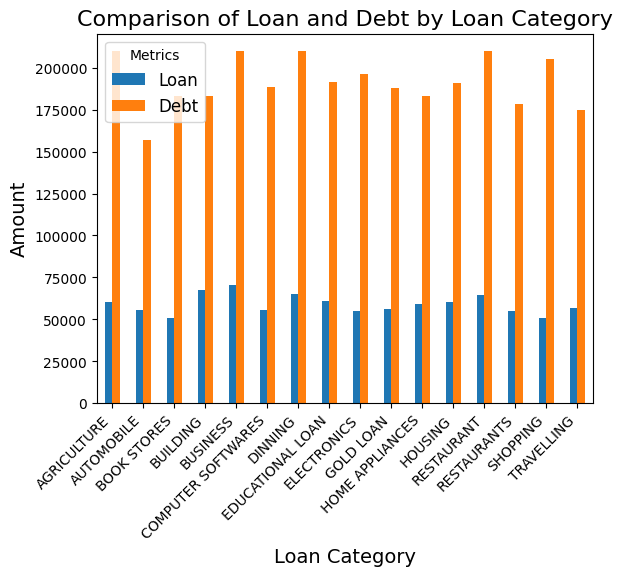

In [29]:
# Comparison of Loan and Debt by Loan Category

# Plot the bar chart
plt.figure(figsize=(18, 10))
grouped_data.plot(x='Loan Category', kind='bar', stacked=False)

# Customize labels and appearance
plt.title('Comparison of Loan and Debt by Loan Category', fontsize=16)
plt.xlabel('Loan Category', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels 45° and align right
plt.legend(title='Metrics', fontsize=12)
plt.show()

> ## Summary of Basic Data Exploration:
> 1. Data Loading & Initial Check – The loan dataset is loaded, and missing values are identified in columns like Income, Expenditure, and Loan.
> 2. Handling Missing Data – Null values are filled with column median to maintain data integrity.
> 3. Data Cleaning – The Debt column is converted from strings to numeric, and outliers in Loan are corrected using the IQR method.
> 4. Statistical Analysis – Descriptive statistics (mean, min, max) are generated, and data is grouped by Loan Category for comparison.
> 5. Final Dataset – The cleaned data is displayed, confirming no missing values and proper formatting for further analysis.
> 6. The total sum of debt is 93491603 and total loan is 34169745.726

> ## Conclusion: 
> The above code effectively cleans and prepares the loan dataset for further analysis. By addressing missing values, converting data types, and handling outliers. The grouped analysis by loan category provides initial insights, which could be expanded with visualizations or predictive modeling. This preprocessing pipeline is essential for accurate and meaningful data exploration.

# Univariate analysis

In [30]:
loan_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,40.946000,10.192883,21.0,32.0,41.5,50.00,60.0
Family Size,500.0,4.550000,1.542809,2.0,3.0,5.0,6.00,7.0
Expenditure,500.0,27462.380000,10019.689308,9000.0,19916.0,25670.0,32617.00,62541.0
Use Frequency,500.0,5.330000,2.048779,2.0,4.0,5.0,7.00,9.0
Debt,500.0,186983.206000,65752.981538,13000.0,210000.0,210000.0,210000.00,428980.0
Overdue,500.0,4.974000,2.491936,1.0,3.0,5.0,7.00,9.0
Loan,500.0,57941.667343,16367.493612,28366.0,45590.5,55723.5,70855.25,98640.0
Returned Cheque,500.0,4.120000,2.777234,0.0,2.0,4.0,6.00,9.0
Dishonour of Bill,500.0,4.310000,2.616025,0.0,2.0,4.0,6.00,10.0


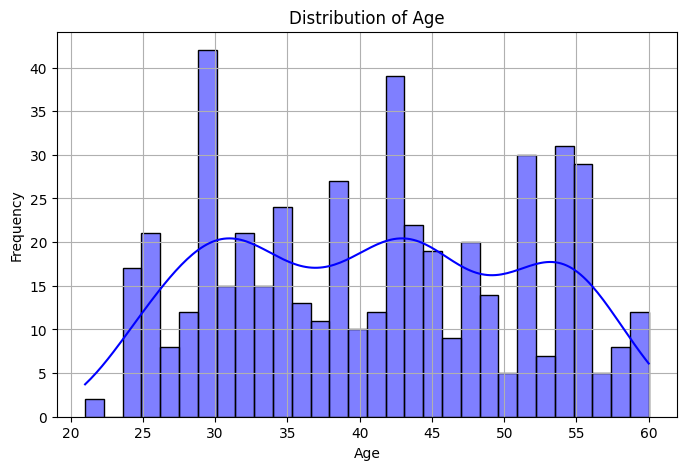

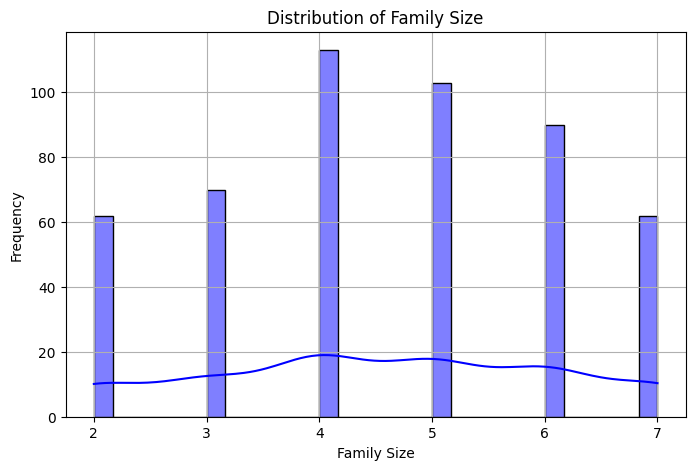

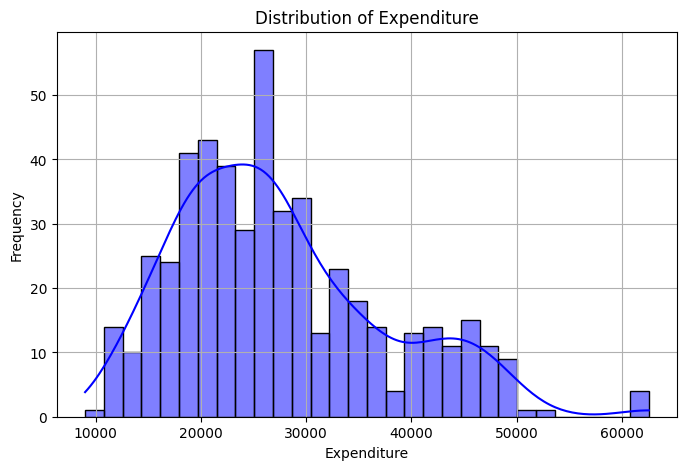

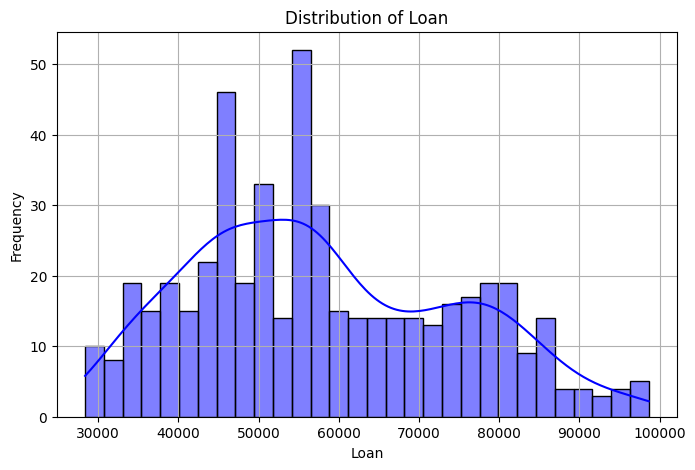

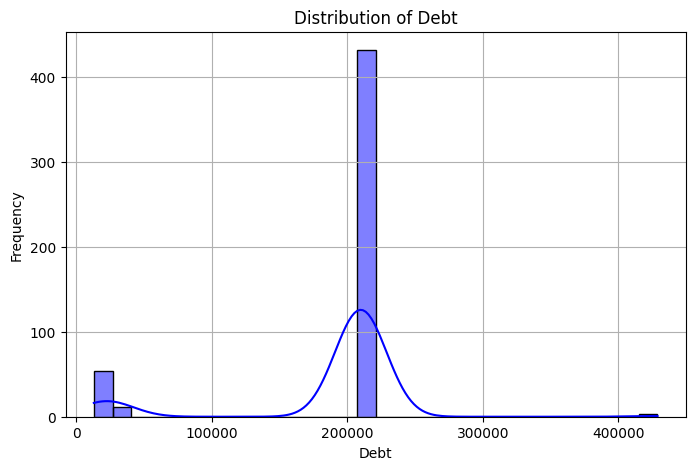

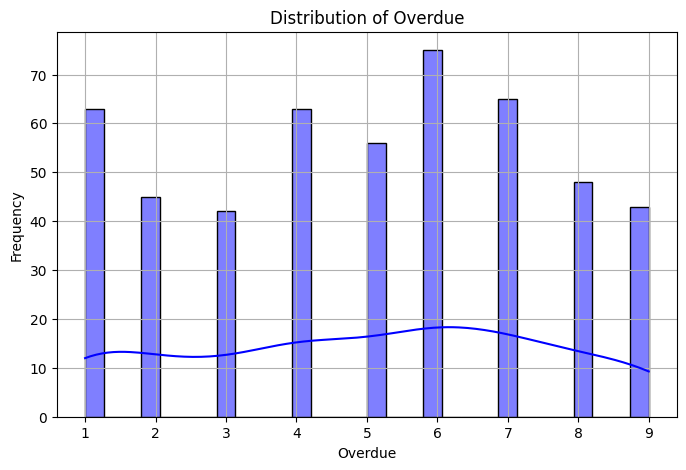

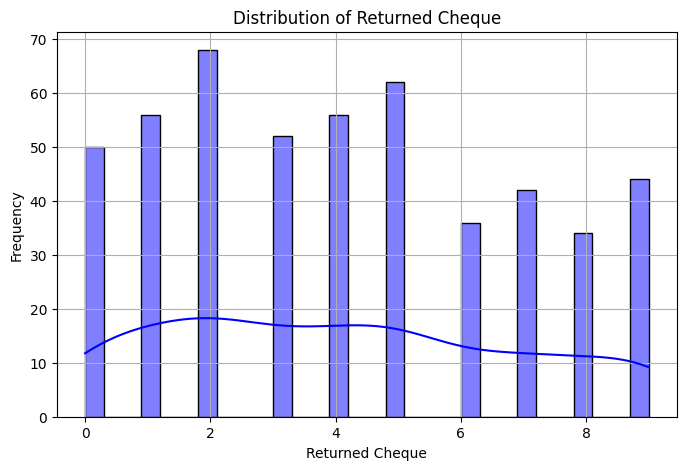

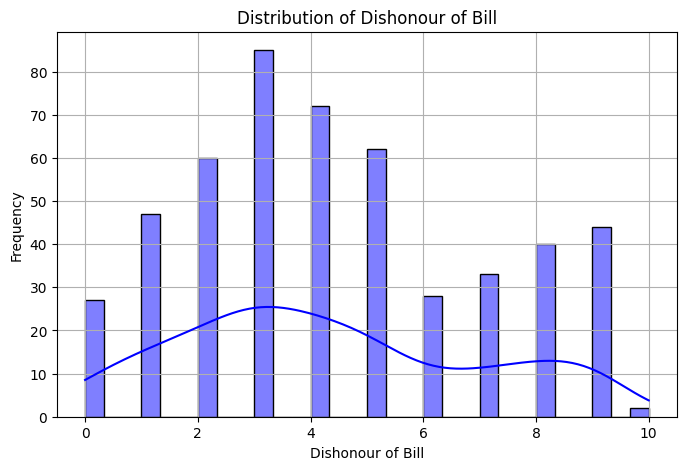

In [31]:
#Univariate Analysis: Histograms for numerical variables
numerical_columns = ['Age', 'Family Size', 'Expenditure', 'Loan', 'Debt', 'Overdue', 'Returned Cheque', 'Dishonour of Bill']
for col in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(loan_copy[col].dropna(), bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

> ## Summary of Univariate:
> - Distribution of age: The data shows a multimodal distribution of age, peaking in the 30s to early 40s and gradually tapering off with age
> - Distribution of family size: Most of the customers family size is between 4 and 6.
> - Distribution of expenditure: It is spreadwidely with concentration on lower range. A gradual decrease is observed as expenditure increases.
> - Distribution of loan: It is bimodal distribution with two peaks. It is right skewed and there is a gradual decrease in frequency as loan amounts increase.
> - Distribution of debt: The debt distribution has a prominent cluster around 200000, with additional smaller peaks slightly near 0 and 400000.
> - Distribution of overdue: The majority of customers have low overdue counts, but some cases show significant overdue instances.
> - Distribution of returned cheques: The frequency of returned cheques varies significantly across different categories. Some categories have notably higher frequencies of returned cheques compared to others, indicating that certain categories are more prone to cheque returns.
> - Distribution of dishonour of bill: Dishonoured bills are mostly on the lower side, with some customers experiencing repeated dishonours.

# Bivariate analysis

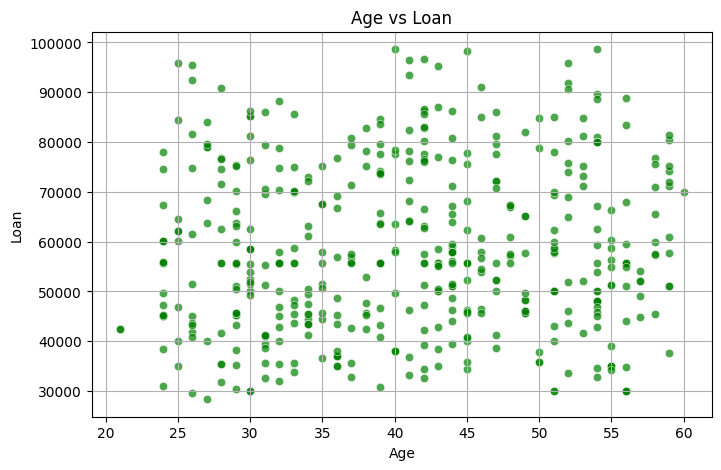

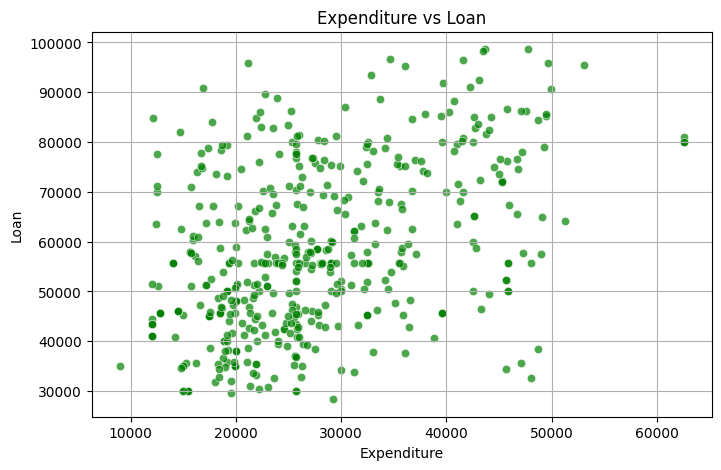

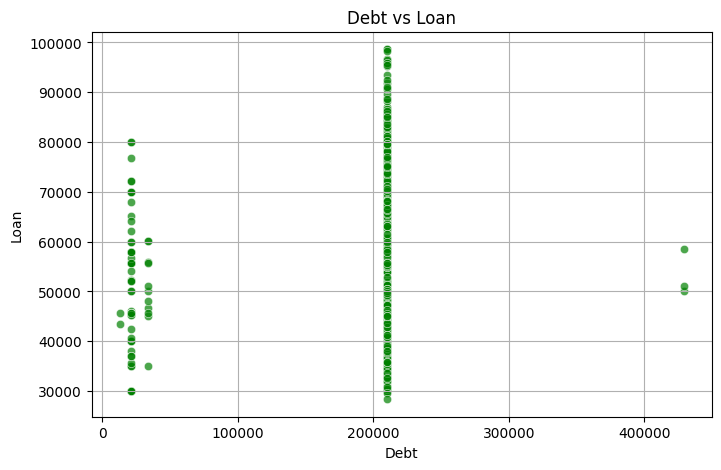

In [32]:
# Bivariate Analysis: Boxplots and Scatterplots
bivariate_pairs = [('Age', 'Loan'), ('Expenditure', 'Loan'), ('Debt', 'Loan')]
for x, y in bivariate_pairs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=loan_copy[x], y=loan_copy[y], alpha=0.7, color="green")
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

> ## Observations of Bivariate Analysis:
> 1. Age vs Loan Scatter PLot:
> - The scatter is widely spread, indicating no strong linear or nonlinear relationship between age and loan amount.
> - Loan sizes seem to be fairly distributed across all age groups.
> 2. Expenditure vs loan scatter plot:
> - There is a visible upward trend - as Expenditure increases, Loan Amount also trends to increase.
> - The majority of data points are clustered between: Expenditure: 10000 to 30000; Loan Amount: 40000 to 80000
> - There's considerable scatter at each expenditure level.
> 3. Debt vs loan:
> - There's a noticeable vertical line of data points at a debt value of 200,000, with loan values ranging between 30,000 and 90,000. This indicates that many individuals or entities have this exact debt value, regardless of varying loan amounts.
> - The vertical clustering at 200,000 debt could imply specific circumstances or conditions leading to this uniform debt value—possibly a fixed repayment structure or standardized financial product.
> - No clear trend in this scatterplot; there's no observable correaltion between debt and loan.

## Data Visualization

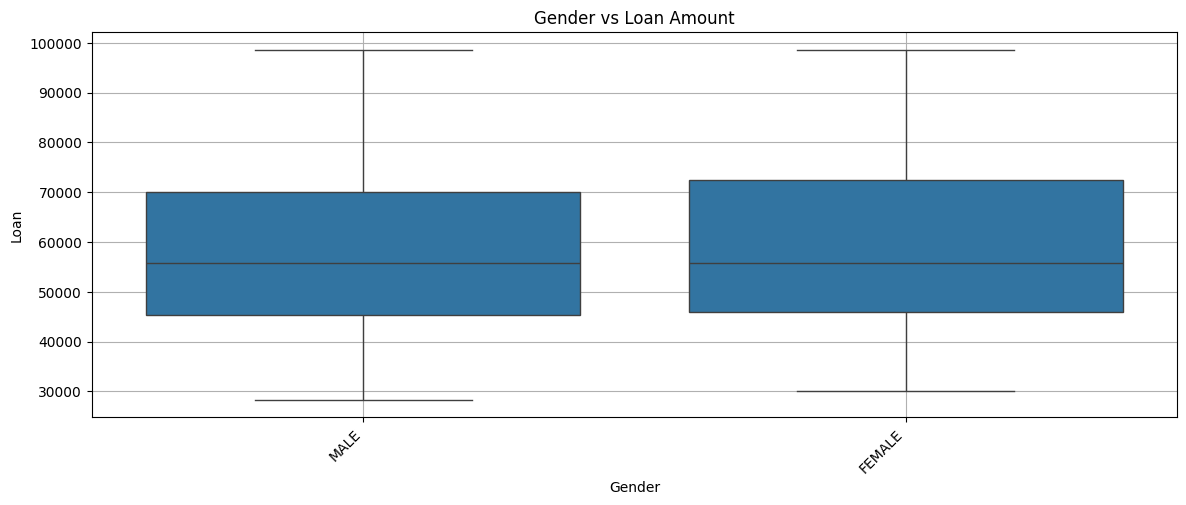

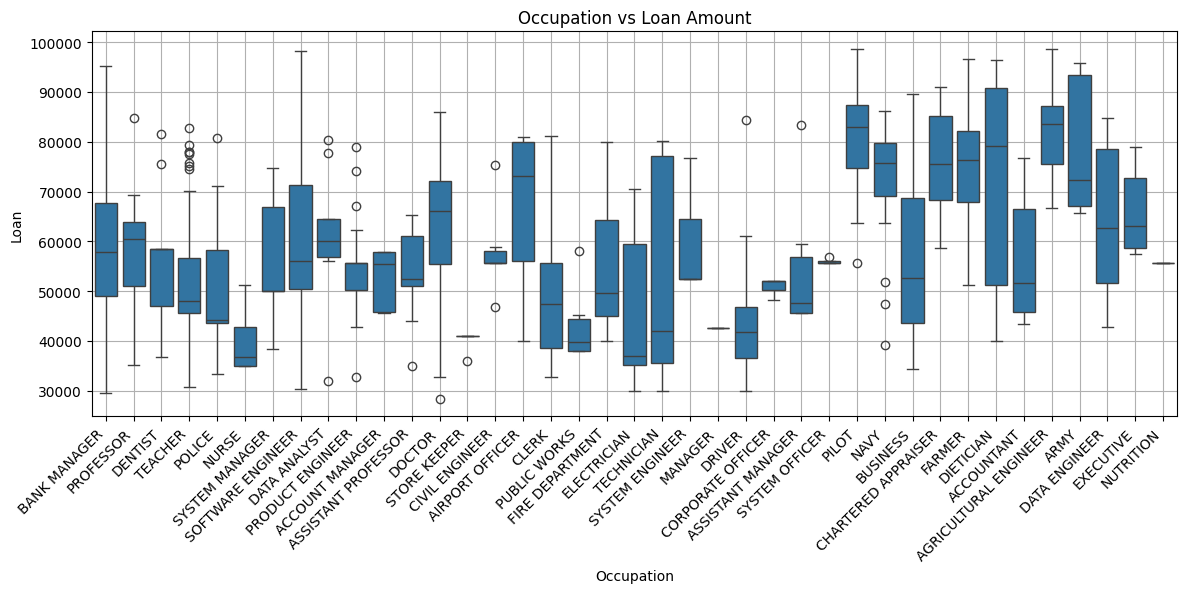

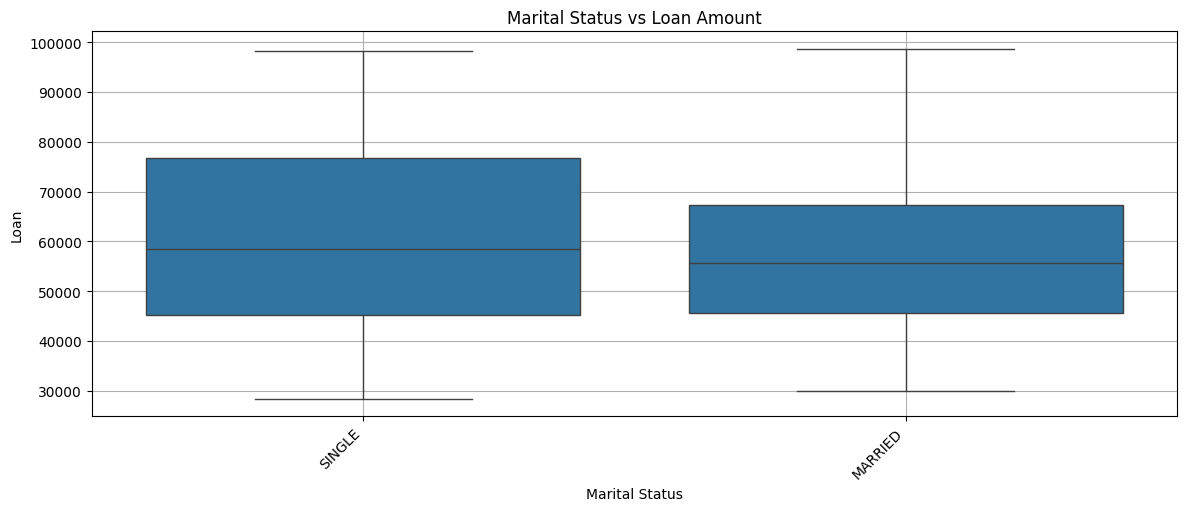

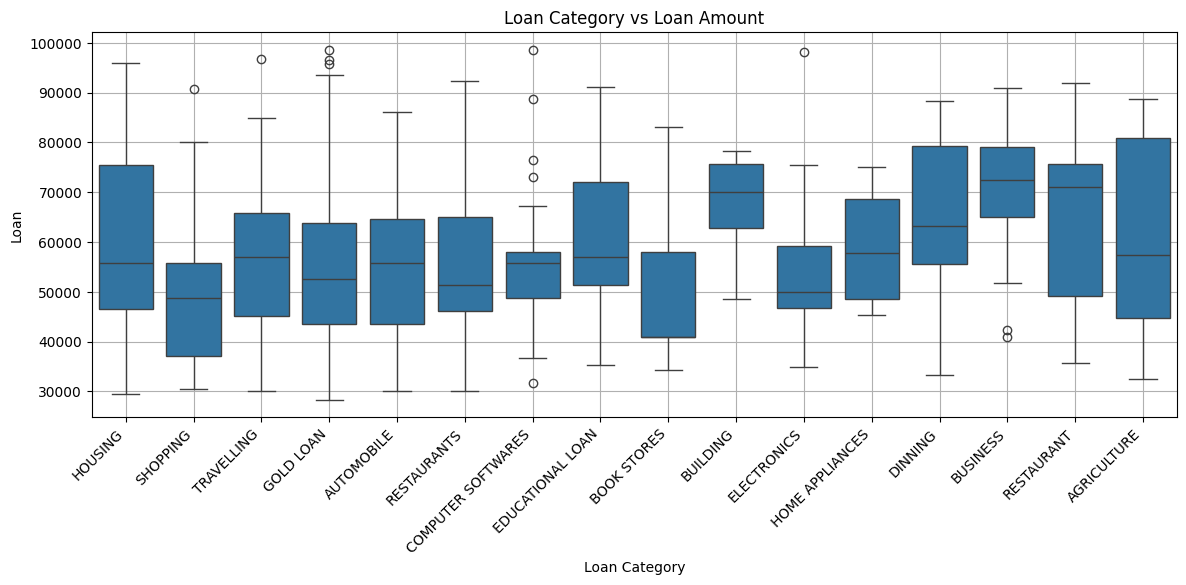

In [33]:
# Boxplots for categorical variables
categorical_columns = ['Gender', 'Occupation', 'Marital Status', 'Loan Category']
for col in categorical_columns:
    plt.figure(figsize=(14, 5))
    sns.boxplot(x=loan_copy[col], y=loan_copy['Loan'])
    plt.title(f"{col} vs Loan Amount")
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

### Observations:
1. Gender vs Loan Amount:
   - From this plot, gender does not seem to have a significant impact on the loan amount distribution. The loan amounts granted to males and females are quite comparable in terms of central tendency and spread.
2. Occupation vs Loan Amount:
   - Occupation clearly impacts loan amounts. Higher-status or high-income roles (e.g., Army, Corporate Officer) tend to get higher loans. There is significant variation within some occupations, and some show notable outliers, which might warrant further analysis.
3. Martial status vs Loan amount:
   - Single individuals tend to receive slightly higher and more variable loan amounts. Married individuals are approved for more consistent but slightly lower loan amounts.
4. Loan Category vs Loan Amount:
   - Loan amount varies significantly by category, with business-related and essential sectors like agriculture, dining, and housing receiving larger loans. Consumer-focused categories like shopping and restaurants see lower, more consistent loan sizes. Outliers and wide ranges in some categories suggest special cases or diverse borrower profiles worth deeper investigation.

# Multivariate Analysis:

###  Multivariate - Using a heatmap to check correlations

In [34]:
# Ensure the column is read as string first, then remove commas and convert to float
loan_copy['Debt'] = loan_copy['Debt'].astype(str).str.replace(',', '').astype(float)

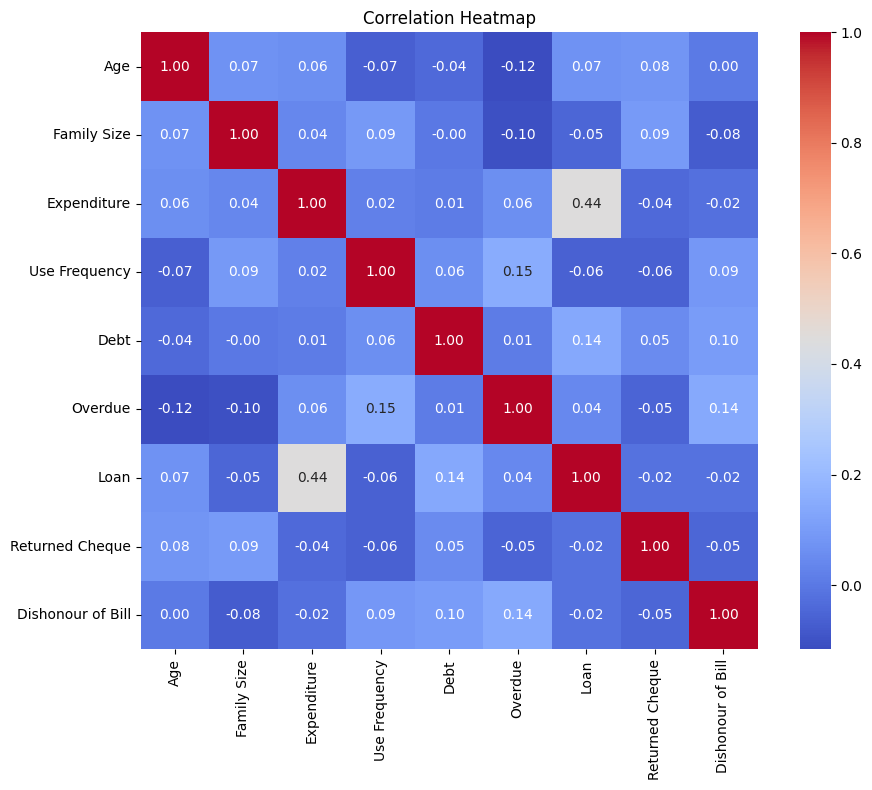

In [35]:
plt.figure(figsize=(10, 8))
corr_matrix = loan_copy.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

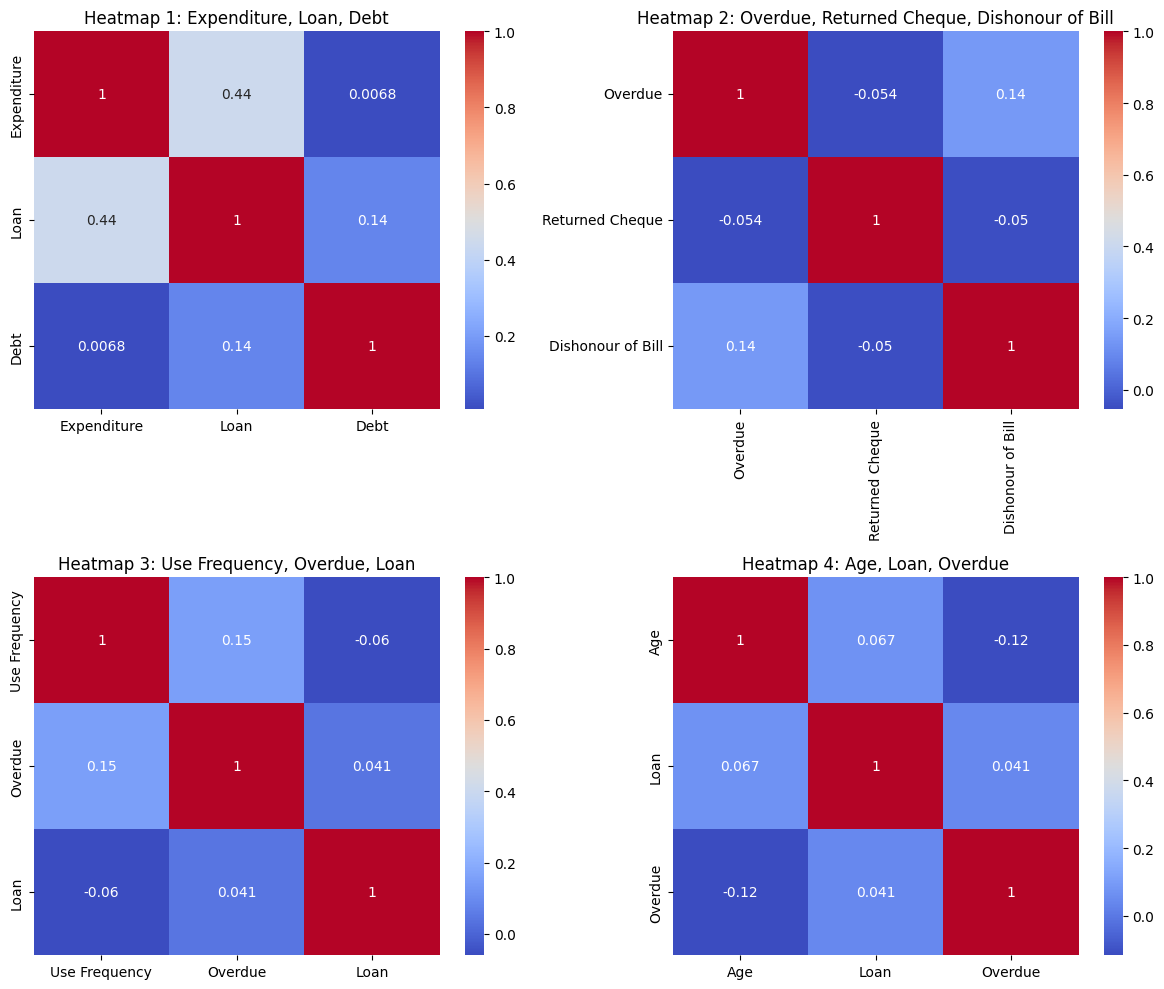

In [36]:
# Define sets of variables for heatmaps 
heatmap1_vars = ["Expenditure", "Loan", "Debt"]
heatmap2_vars = ["Overdue", "Returned Cheque", "Dishonour of Bill"]
heatmap3_vars = ["Use Frequency", "Overdue", "Loan"]
heatmap4_vars = ["Age", "Loan", "Overdue"]

# Create subplots for the four heatmaps
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Heatmap 1: Expenditure, Loan, Debt 
sns.heatmap(loan_copy[heatmap1_vars].corr(), annot=True, cmap="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Heatmap 1: Expenditure, Loan, Debt")

# Heatmap 2: Overdue, Returned Cheque, Dishonour of Bill
sns.heatmap(loan_copy[heatmap2_vars].corr(), annot=True, cmap="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Heatmap 2: Overdue, Returned Cheque, Dishonour of Bill")

# Heatmap 3: Use Frequency, Overdue, Loan
sns.heatmap(loan_copy[heatmap3_vars].corr(), annot=True, cmap="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Heatmap 3: Use Frequency, Overdue, Loan")

# Heatmap 4: Age, Loan, Overdue
sns.heatmap(loan_copy[heatmap4_vars].corr(), annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Heatmap 4: Age, Loan, Overdue")

# Display the four heatmaps
plt.tight_layout()
plt.show()

In [37]:
# Calculating correlation values for each heatmap (updated correlation1)
correlation1 = loan_copy[["Expenditure", "Loan", "Debt"]].corr()
correlation2 = loan_copy[["Overdue", "Returned Cheque", "Dishonour of Bill"]].corr()
correlation3 = loan_copy[["Use Frequency", "Overdue", "Loan"]].corr()
correlation4 = loan_copy[["Age", "Loan", "Overdue"]].corr()

print("Correlation Matrix for Expenditure, Loan, Debt:")
print(correlation1)

print("\nCorrelation Matrix for Overdue, Returned Cheque, Dishonour of Bill:")
print(correlation2)

print("\nCorrelation Matrix for Use Frequency, Overdue, Loan:")
print(correlation3)

print("\nCorrelation Matrix for Age, Loan, Overdue:")
print(correlation4)

Correlation Matrix for Expenditure, Loan, Debt:
             Expenditure      Loan      Debt
Expenditure     1.000000  0.442073  0.006765
Loan            0.442073  1.000000  0.138886
Debt            0.006765  0.138886  1.000000

Correlation Matrix for Overdue, Returned Cheque, Dishonour of Bill:
                    Overdue  Returned Cheque  Dishonour of Bill
Overdue            1.000000        -0.054277           0.142956
Returned Cheque   -0.054277         1.000000          -0.049815
Dishonour of Bill  0.142956        -0.049815           1.000000

Correlation Matrix for Use Frequency, Overdue, Loan:
               Use Frequency   Overdue      Loan
Use Frequency       1.000000  0.151629 -0.059761
Overdue             0.151629  1.000000  0.040692
Loan               -0.059761  0.040692  1.000000

Correlation Matrix for Age, Loan, Overdue:
              Age      Loan   Overdue
Age      1.000000  0.067265 -0.116430
Loan     0.067265  1.000000  0.040692
Overdue -0.116430  0.040692  1.000000


## Observations:

### Trends from the Four Heatmaps
1. ##### HEATMAP 1: Expenditure, Loan, Debt
- Expenditure and Loan have a moderate positive correlation (0.4421) — people who spend more also tend to have larger loans.
- Expenditure and Debt have a very weak positive correlation (0.0068) — suggesting almost no relationship.
- Loan and Debt show a weak positive correlation (0.1389) — borrowers with higher loans might also carry slightly more debt.
 
2. ##### HEATMAP 2: Overdue, Returned Cheque, Dishonour of Bill
- Overdue and Dishonour of Bill maintain a mild positive correlation (0.1430) — a slight tendency for missed payments and bill dishonours to occur together.
- Overdue and Returned Cheque are weakly negatively correlated (-0.0543).
- Returned Cheque and Dishonour of Bill also show a negative correlation (-0.0498) — indicating differing risk triggers
 
3. ##### HEATMAP 3: Use Frequency, Overdue, Loan
- Use Frequency and Overdue have a mild positive correlation (0.1516) — frequent users are slightly more likely to miss payments.
- Use Frequency and Loan show a weak negative correlation (-0.0598) — perhaps heavier users aren't borrowing large amounts.
- Overdue and Loan show a very weak positive correlation (0.0407).
4. ##### HEATMAP 4: Age, Loan, Overdue
- Age and Overdue have a weak negative correlation (-0.1164) — younger individuals may miss payments more often.
- Age and Loan have a weak positive correlation (0.0673) — older people may take slightly larger loans.
- Loan and Overdue again show a very weak positive correlation (0.0407).
 
##### Overall Insights:
- Expenditure is moderately linked with Loan (0.4421).
- Loan and Debt are weakly correlated (0.1389), indicating some overlap in borrowing behavior.
- Risk indicators (Overdue, Cheques, Bills) are only weakly related, suggesting diverse risk patterns.
- Age and Use Frequency offer behavioral clues — younger and frequent users tend to have slightly more overdue behavior.
- Loan and Overdue still show low predictive value (0.0407).

> # EDA Summary
> 1. **Data Understanding and Preprocessing:**
> - Missing values were identified and filled using the median for columns like Expenditure and Loan.
> - Duplicate columns were checked, and the Income column was dropped for redundancy.
> - Outliers in numerical columns (Loan and Debt) were identified using the IQR method and replaced with the mean.
> 2. **Dataset Structure:**
>- Descriptive statistics revealed key insights into the numerical columns such as Loan, Debt, and Expenditure.
>- Data type conversion was applied (e.g., converting Debt from string to numeric).
> 3. **Univariate Analysis:**
>- Histograms were plotted for numerical variables, showing the distribution of values across columns like Loan and Debt.
> 4. **Bivariate Analysis:**
> - Scatterplots (e.g., Expenditure vs Loan) and boxplots (e.g., Loan Category vs Loan Amount) were used to analyze relationships.
> - Insights into categorical columns like Gender, Occupation, and Loan Category were obtained through visualizations.
> 5. **Correlation Analysis:**
> - A heatmap displayed correlations between numerical variables such as Expenditure, Loan, and Debt.
> - Specific subsets of correlations were examined through focused heatmaps.
> 6. **Key Visualizations:**
> - Scatterplots for key numerical relationships.
> - Boxplots for categorical relationships.
> - Heatmaps to highlight pairwise correlations.
>   
> The EDA provided valuable insights into the dataset, revealing key relationships between financial variables such as Loan, Debt, and Expenditure. The data was successfully cleaned, missing values were handled, and outliers were treated to ensure reliability. Visualizations helped uncover trends across numerical and categorical variables, highlighting patterns that could be explored further. The correlation analysis indicated significant dependencies, suggesting potential areas for predictive modeling.

# Data Mining Questions:

In [38]:
#1. How many different occupations were there in the loan dataset.

# Count the number of people in each occupation
occupation_counts = loan_copy['Occupation'].value_counts()

# Calculate the number of unique occupations
number_of_occupations = loan_copy['Occupation'].nunique()

print(f"There are {number_of_occupations} unique occupations in the dataset.\n")
print("Counts of people in each occupation:")
print(occupation_counts)

There are 39 unique occupations in the dataset.

Counts of people in each occupation:
Occupation
TEACHER                  63
SOFTWARE ENGINEER        35
DOCTOR                   29
BANK MANAGER             28
CLERK                    26
PRODUCT ENGINEER         21
POLICE                   18
DRIVER                   18
NAVY                     16
BUSINESS                 16
AIRPORT OFFICER          15
PILOT                    15
DIETICIAN                13
TECHNICIAN               12
FIRE DEPARTMENT          12
CHARTERED APPRAISER      11
ACCOUNT MANAGER          11
NURSE                    11
DENTIST                  10
SYSTEM MANAGER           10
ASSISTANT PROFESSOR       9
PROFESSOR                 8
ELECTRICIAN               8
AGRICULTURAL ENGINEER     8
DATA ANALYST              8
DATA ENGINEER             7
FARMER                    7
ACCOUNTANT                7
EXECUTIVE                 7
CIVIL ENGINEER            6
PUBLIC WORKS              6
ASSISTANT MANAGER         6
ARMY   

**Ans: There are 39 different occupations present in loan dataset.**

Loan Category Frequency:
Loan Category
GOLD LOAN             77
HOUSING               67
AUTOMOBILE            60
TRAVELLING            53
RESTAURANTS           41
SHOPPING              35
COMPUTER SOFTWARES    35
BUSINESS              24
EDUCATIONAL LOAN      20
RESTAURANT            20
HOME APPLIANCES       14
ELECTRONICS           14
DINNING               14
AGRICULTURE           12
BOOK STORES            7
BUILDING               7
Name: count, dtype: int64

The most common loan category is 'GOLD LOAN' with 77 applicants.
The least popular loan category is 'BOOK STORES' with 7 applicants.


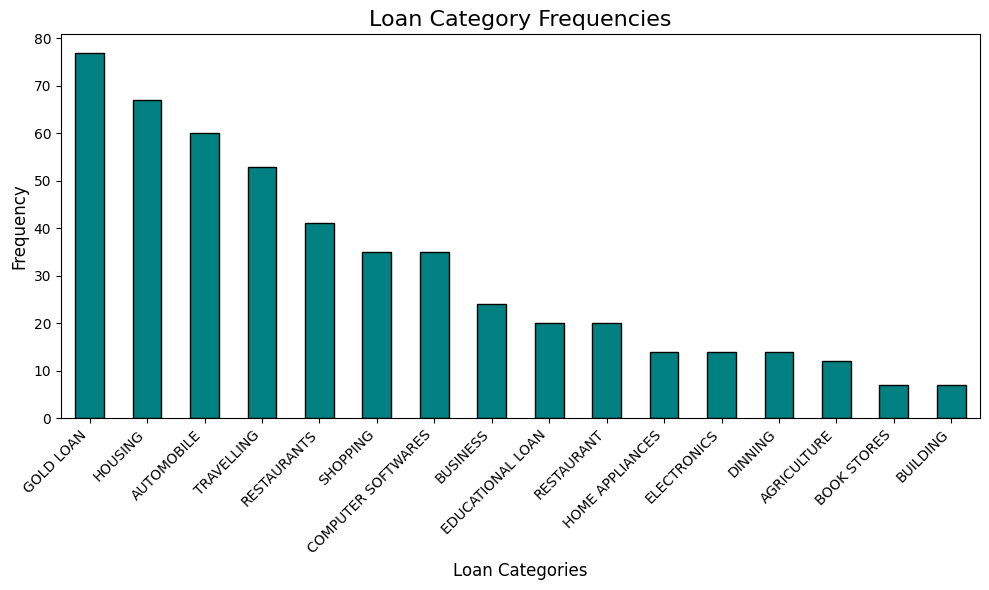

In [39]:
#2. What is the most common loan categories? Which loan category is least popular among applicants?
# Count the frequency of each loan category
loan_category_counts = loan_copy['Loan Category'].value_counts()

# Find the most common and least popular loan categories
most_common_category = loan_category_counts.idxmax()
most_common_count = loan_category_counts.max()

least_popular_category = loan_category_counts.idxmin()
least_popular_count = loan_category_counts.min()

# Display results
print("Loan Category Frequency:")
print(loan_category_counts)
print(f"\nThe most common loan category is '{most_common_category}' with {most_common_count} applicants.")
print(f"The least popular loan category is '{least_popular_category}' with {least_popular_count} applicants.")

# Visualize the loan category frequencies
plt.figure(figsize=(10, 6))
loan_category_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Loan Category Frequencies', fontsize=16)
plt.xlabel('Loan Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

**Ans: The most common loan category among applicants is GOLD LOAN, with 77 applicants.
The least common category among applicatns is BOOKSTORS with 7 applicants.**

Average, Maximum, and Minimum Loan by Loan Category:
                            mean      max      min
Loan Category                                     
AGRICULTURE         60372.666667  88768.0  32571.0
AUTOMOBILE          55289.886122  86184.0  30000.0
BOOK STORES         50903.142857  83053.0  34275.0
BUILDING            67703.500000  78294.0  48613.0
BUSINESS            70246.541667  90863.0  40883.0
COMPUTER SOFTWARES  55650.942915  98640.0  31747.0
DINNING             65068.821429  88323.0  33312.0
EDUCATIONAL LOAN    61107.525000  91088.0  35247.0
ELECTRONICS         54728.428571  98199.0  34836.0
GOLD LOAN           56353.017334  98586.0  28366.0
HOME APPLIANCES     58895.428571  75106.0  45389.0
HOUSING             60294.136826  95853.0  29565.0
RESTAURANT          64647.100000  91853.0  35735.0
RESTAURANTS         55252.926829  92425.0  30000.0
SHOPPING            50916.957143  90687.0  30454.0
TRAVELLING          57016.584906  96681.0  30000.0

The loan category with the h

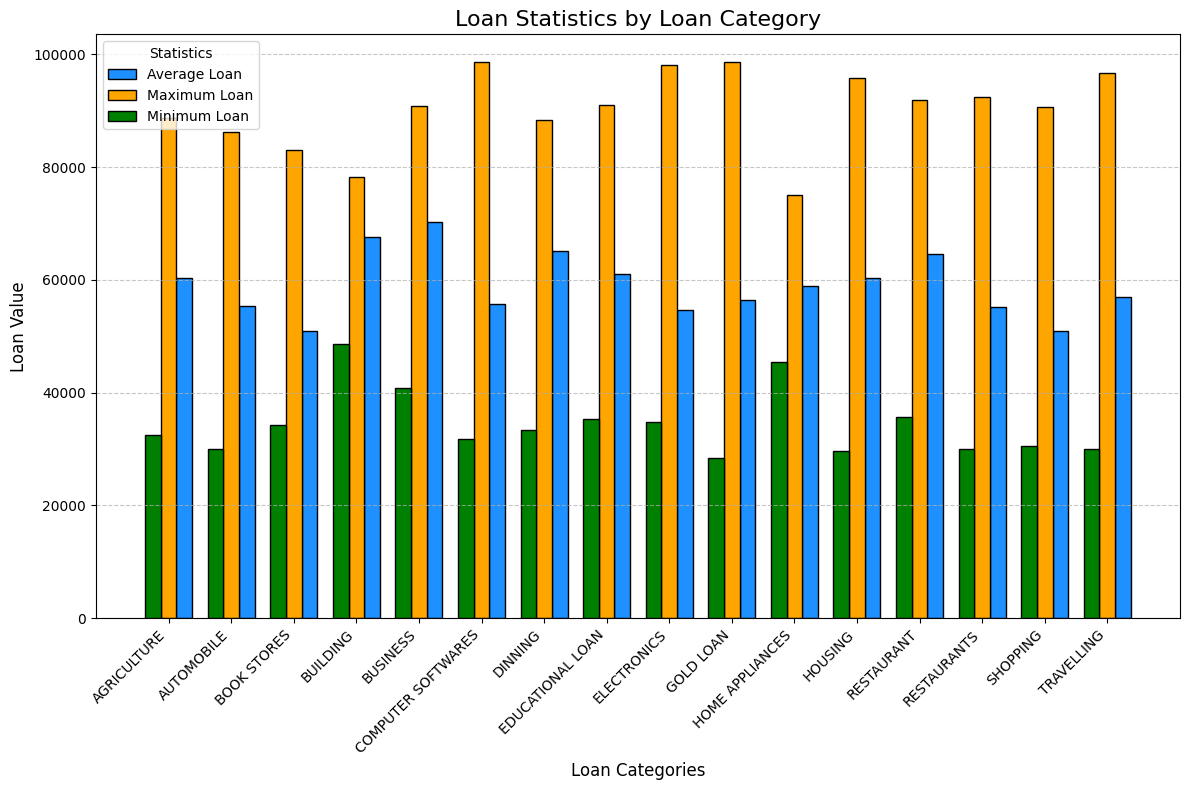

In [40]:
#3. What is the maximum, minimum and average loan with respect to loan category
# Group by Loan Category to calculate average, max, and min loan values
loan_category_stats = loan_copy.groupby('Loan Category')['Loan'].agg(['mean', 'max', 'min'])

# Find the category with the highest maximum loan amount
max_loan_category = loan_category_stats['max'].idxmax()
max_loan_value = loan_category_stats['max'].max()

# Find the category with the lowest minimum loan amount
min_loan_category = loan_category_stats['min'].idxmin()
min_loan_value = loan_category_stats['min'].min()

# Display numerical data for analysis
print("Average, Maximum, and Minimum Loan by Loan Category:")
print(loan_category_stats)
print(f"\nThe loan category with the highest maximum loan amount is '{max_loan_category}' with a loan value of {max_loan_value}.")
print(f"The loan category with the lowest minimum loan amount is '{min_loan_category}' with a loan value of {min_loan_value}.")

# Plot mean, max, and min loan values
plt.figure(figsize=(12, 8))  # Adjust figure size for better visualization
bar_width = 0.25  # Set width for bars

# Get x-axis positions for grouped bars
x_positions = range(len(loan_category_stats))

# Plot Average Loan
plt.bar([x + bar_width for x in x_positions], loan_category_stats['mean'], color='dodgerblue', edgecolor='black', width=bar_width, label='Average Loan')

# Plot Maximum Loan
plt.bar([x for x in x_positions], loan_category_stats['max'], color='orange', edgecolor='black', width=bar_width, label='Maximum Loan')

# Plot Minimum Loan
plt.bar([x - bar_width for x in x_positions], loan_category_stats['min'], color='green', edgecolor='black', width=bar_width, label='Minimum Loan')

# Customize the plot
plt.title('Loan Statistics by Loan Category', fontsize=16)
plt.xlabel('Loan Categories', fontsize=12)
plt.ylabel('Loan Value', fontsize=12)
plt.xticks([x for x in x_positions], loan_category_stats.index, rotation=45, ha='right')
plt.legend(title='Statistics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Ans: The maximum loan category is COMPUTER SOFTWARES, with a loan value of 98,640.0.**

**The minimum loan category is GOLD LOAN, with a loan value of 28366.0.**

**For average loan amounts, we see mid-range borrowing across most categories, reflecting diverse financial needs.**

> ### Observations:
> 1. Highest Maximum Loan Amount: The loan category with the highest maximum loan amount is COMPUTER SOFTWARES, with a loan value of 98,640.0. This suggests a preference for higher loan approvals in this category, perhaps for large-scale software development projects.
> 2. Average Loans Across Categories: Categories like Business, Educational Loan, and Gold Loan have notable average loan amounts, reflecting moderate borrowing trends for these needs.
> 3. Category-Specific Trends: While COMPUTER SOFTWARES tops the maximum loan value, other categories such as Travelling and Housing show higher-than-average loans, possibly indicating more frequent yet slightly smaller borrowing.
> 4. The GOLD LOAN category has the lowest minimum loan value at 28,366.0.

In [41]:
#4. What is the distribution of different loan categories across various age groups?
u35 = loan_copy[loan_copy['Age']<35]
 
o35_u47 = loan_copy[(loan_copy['Age']>35) & (loan_copy['Age']<47)]
 
o47 = loan_copy[loan_copy['Age']>47]

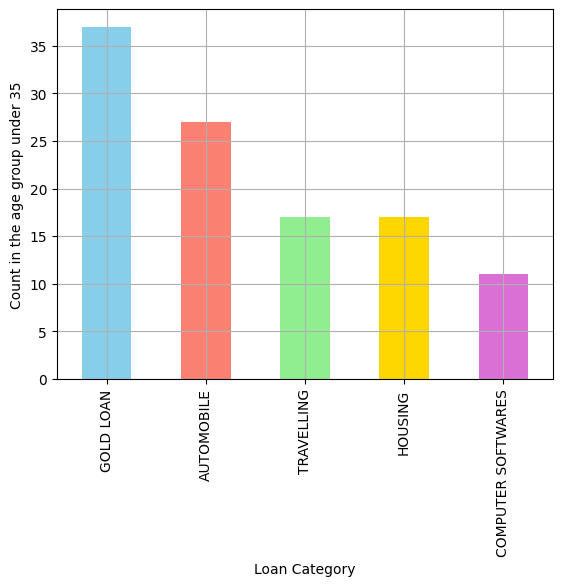

In [42]:
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orchid']
u35['Loan Category'].value_counts().head().plot(kind='bar', color = colors);plt.grid()
plt.xlabel('Loan Category')
plt.ylabel('Count in the age group under 35');

**Ans: Gold loans appear to have the highest count among the loan categories, suggesting a strong preference or reliance on this type of loan for individuals in this age group. Automobile loans and housing loans also show significant counts, indicating a focus on long-term investments like buying vehicles and homes.**

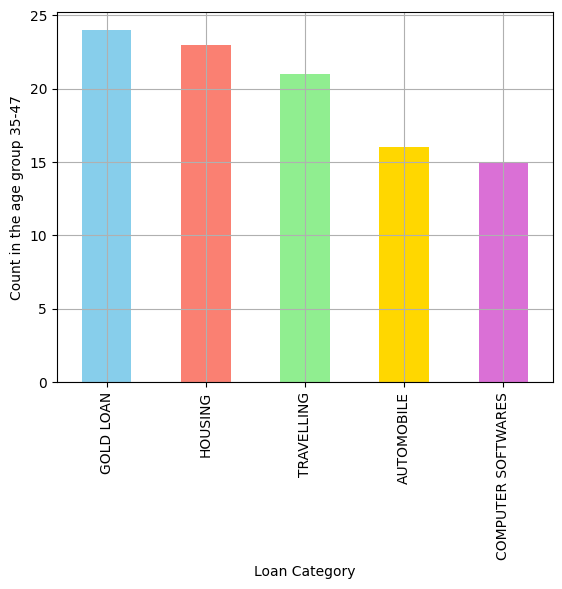

In [43]:
o35_u47['Loan Category'].value_counts().head().plot(kind='bar', color = colors)
plt.grid()
plt.xlabel('Loan Category')
plt.ylabel('Count in the age group 35-47');

**Ans: Gold loans have the highest count (23), indicating that this type of loan is the most popular among individuals in this age group. And housing loans follow closely with a count of 22, suggesting that property investment or home purchases are a major financial priority.**

> ## Observations
> Automobile loans are less common compared to housing, potentially due to prior ownership or reduced interest in upgrading vehicles within this age group. Computer software loans might cater to niche interests or professional requirements, making them the least popular option.

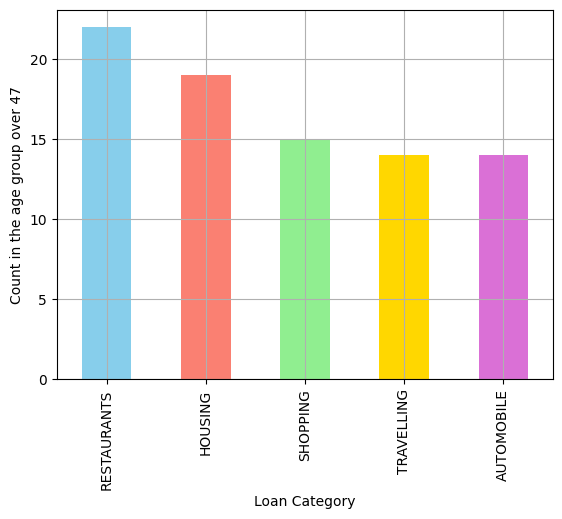

In [44]:
o47['Loan Category'].value_counts().head().plot(kind='bar',color = colors)
plt.grid()
plt.xlabel('Loan Category')
plt.ylabel('Count in the age group over 47');

**Ans: Restaurants have the highest count among loan categories for this age group, indicating a strong preference or need for loans related to dining or culinary purposes. Housing loans rank second, showing that property-related financial needs are still relevant to this demographic.**

> ## Observations:
> 1. Restaurants leading the chart might highlight lifestyle choices, with individuals in this age group prioritizing social or leisure-related expenditures.
> 2. The significant count of housing loans suggests continued investment in property or home-related expenses, possibly for renovations or second homes.
> 3. Automobile loans being the least significant might imply reduced interest in purchasing or upgrading vehicles within this age group.

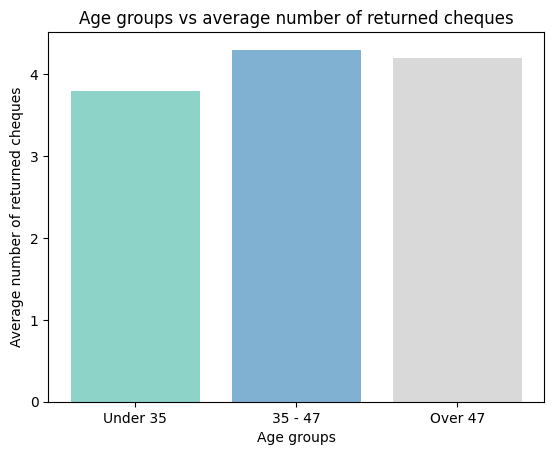

In [45]:
#5. How does the average number of returned cheques vary across different age groups?"
# Average number of returned cheques
age_groups_mean_returned_cheque = [u35['Returned Cheque'].mean().round(2), o35_u47['Returned Cheque'].mean().round(2), o47['Returned Cheque'].mean().round(2)]
age_groups = ["Under 35", "35 - 47", "Over 47"]
cmap = plt.colormaps.get_cmap('Set3')
colors = [cmap(i / len(age_groups)) for i in range(len(age_groups))]
plt.bar(age_groups, age_groups_mean_returned_cheque,color = colors);
plt.xlabel('Age groups')
plt.ylabel('Average number of returned cheques')
plt.title('Age groups vs average number of returned cheques');

**Ans: The highest average of returned cheques is seen in the 35–47 age group, reflecting potential financial challenges.**

> ## Observations:
> 1. The 35–47 age group stands out with the highest average of returned cheques, possibly indicating financial pressures or obligations that lead to challenges in maintaining cheque payments.
> 2. The Under 35 age group has the lowest average, which might reflect more cautious financial behavior, fewer responsibilities, or fewer cheque-based transactions.
> 3. The Over 47 age group shows moderate cheque return rates, likely influenced by a mix of financial stability and reduced dependence on cheque-based payments.

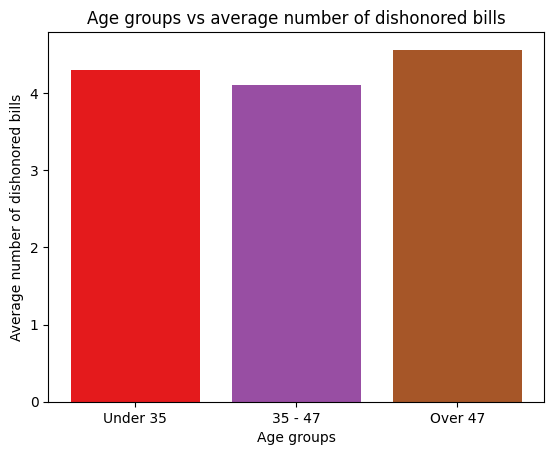

In [46]:
#6. How does the average number of dishonoured bill vary across different age groups?"
# Average number of dishonored bills
age_groups_mean_dishonored_bill = [u35['Dishonour of Bill'].mean().round(2), o35_u47['Dishonour of Bill'].mean().round(2), o47['Dishonour of Bill'].mean().round(2)]
 
cmap = plt.colormaps.get_cmap('Set1')
colors = [cmap(i / len(age_groups)) for i in range(len(age_groups))]
plt.bar(age_groups, age_groups_mean_dishonored_bill,color = colors);
plt.xlabel('Age groups')
plt.ylabel('Average number of dishonored bills')
plt.title('Age groups vs average number of dishonored bills');

**Ans: The under-35 and over-47 groups have the highest average of dishonored bills at 4.5, with the 35–47 group slightly lower at 4.0.**

> ## Observations:
> 1. Under 35: This group, along with the over-47 demographic, shares the highest average of dishonored bills. This could indicate a mix of financial inexperience or heavy reliance on bills for transactions.
> 2. 35 - 47: The slightly lower average might suggest this group has more stable financial management or reduced reliance on cheques or bills.
> 3. Over 47: The rise in dishonored bills in this group could be due to fixed incomes or other financial constraints leading to transaction challenges.

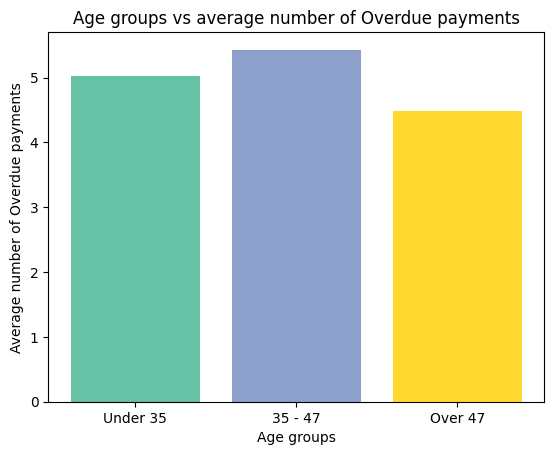

In [47]:
#7. How does the average number of Overdue payment vary across different age groups?"
# Average number of overdue payments
age_groups_mean_overdue = [u35['Overdue'].mean().round(2), o35_u47['Overdue'].mean().round(2), o47['Overdue'].mean().round(2)]
 
cmap = plt.colormaps.get_cmap('Set2')
colors = [cmap(i / len(age_groups)) for i in range(len(age_groups))]
plt.bar(age_groups, age_groups_mean_overdue,color = colors);
plt.xlabel('Age groups')
plt.ylabel('Average number of Overdue payments')
plt.title('Age groups vs average number of Overdue payments');

**Ans: The average number of overdue payments varies across age groups, with the 35–47 age group showing the highest average, followed by those under 35, and the over 47 age group showing the lowest average.**

> ## Observation:
> The over 47 age group has the lowest average, suggesting better financial management or fewer financial obligations.

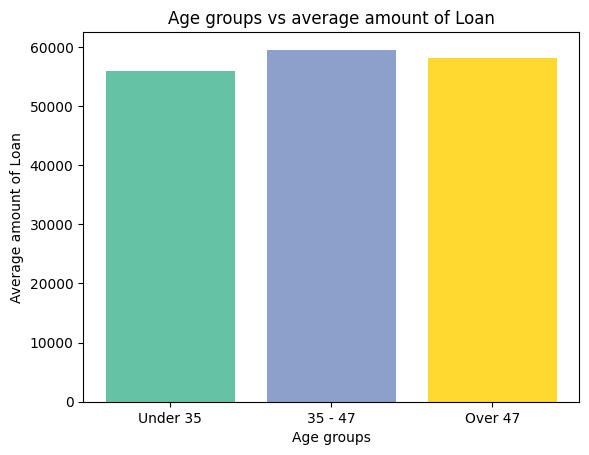

In [48]:
#8. What is the relationship between age groups and the average loan amount?
# age vs loan
age_groups_mean_loan = [u35['Loan'].mean().round(2), o35_u47['Loan'].mean().round(2), o47['Loan'].mean().round(2)]
 
cmap = plt.colormaps.get_cmap('Set2')
colors = [cmap(i / len(age_groups)) for i in range(len(age_groups))]
plt.bar(age_groups, age_groups_mean_loan,color = colors);
plt.xlabel('Age groups')
plt.ylabel('Average amount of Loan')
plt.title('Age groups vs average amount of Loan');

**Ans: The 35–47 age group has the highest average loan amount, slightly above 59,000. The Under 35 age group has the lowest average loan amount, slightly above 55,000. The Over 47 age group falls in between these two, below 59,000 but higher than the "Under 35" group.**

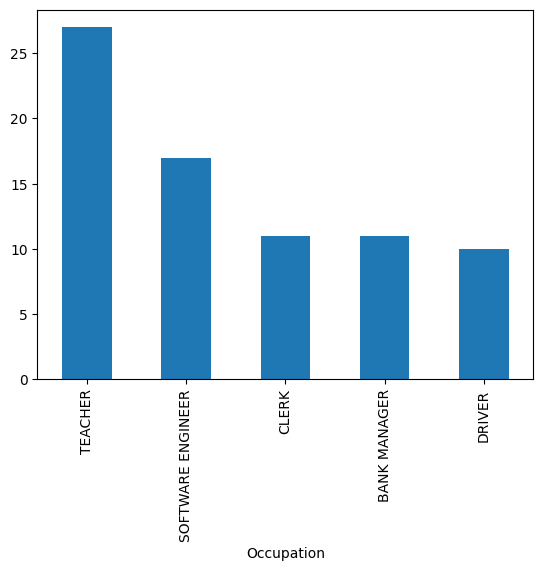

In [49]:
#9. Which occupations are most frequently associated with high dishonor of bills?
high_dishonour = loan_copy[loan_copy['Dishonour of Bill']>4]
high_dishonour['Occupation'].value_counts().head().plot(kind='bar');

**Ans: The occupation with the highest count of individuals with more than 4 dishonored bills is TEACHER (27 individuals), while DRIVER has the lowest count (10 individuals).**

> ## Observations:
> 1. Teachers make up the largest group of individuals with high dishonor of bills, possibly reflecting financial challenges faced in this profession.
> 2. Drivers represent the smallest group, suggesting fewer dishonored bills in this category, though this may also correlate with the total sample size of drivers in the dataset.
> 3. Other occupations like Software Engineers, Clerks, and Bank Managers show significant but lower counts compared to teachers.

Loan Frequency by Family Size:
Family Size
2     62
3     70
4    113
5    103
6     90
7     62
Name: Loan, dtype: int64


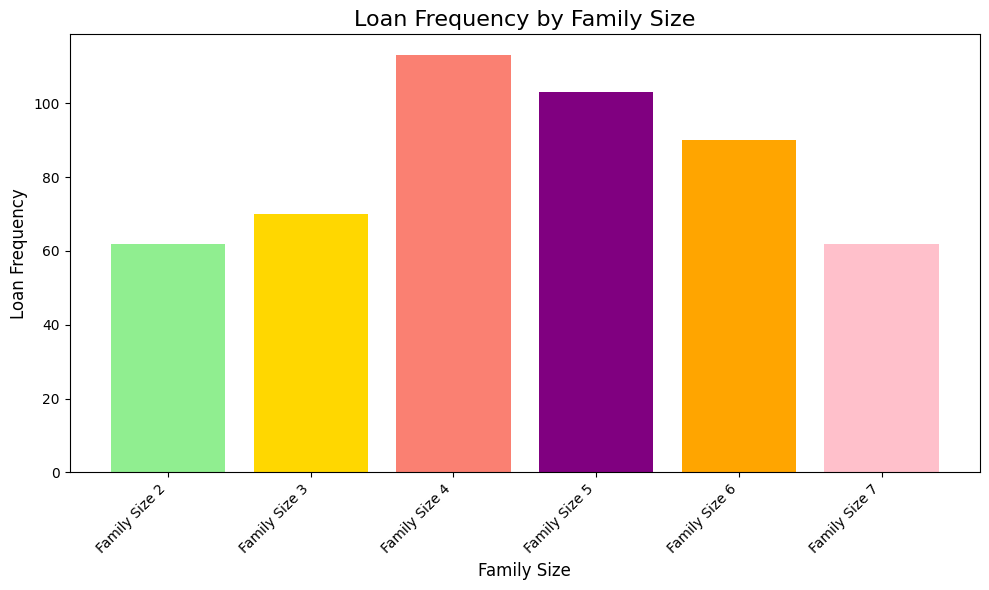

In [50]:
#10. Is there a relationship between family size and frequency of loan use?
# Group by Family Size and calculate Loan Frequency
loan_frequency = loan_copy.groupby('Family Size')['Loan'].count()  # Replace 'Loan' with your loan frequency column
print("Loan Frequency by Family Size:")
print(loan_frequency)

# Define colors for family size bins
family_colors = {
    1: 'skyblue',
    2: 'lightgreen',
    3: 'gold',
    4: 'salmon',
    5: 'purple',
    6: 'orange',
    7: 'pink'  # Add more colors as needed
}

# Plot Loan Frequency with bin-specific colors
plt.figure(figsize=(10, 6))
for family_size, frequency in loan_frequency.items():
    plt.bar(f'Family Size {int(family_size)}', frequency, color=family_colors.get(int(family_size), 'gray'))

plt.title("Loan Frequency by Family Size", fontsize=16)
plt.xlabel("Family Size", fontsize=12)
plt.ylabel("Loan Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Ans: Families of size 4 have the highest frequency of loan use with 113 instances.**

**Families of size 2 and 7 have the lowest loan frequency, with 62 instances each.**

> ### Observations:
> 1. Family Size with Most Frequent Loan Use: Families of size 4 have the highest loan frequency (113 instances), indicating they are more likely to take loans compared to families of other sizes.
> 2. Next Frequent Loan Users: Families of size 5 and 6 follow, with 103 and 90 loan instances respectively, showing a slightly lower demand but still significant.
> 3. Least Frequent Loan Use: Families of size 2 and 7 have the lowest loan frequency (62 instances each), possibly reflecting less reliance or need for loans.
> 4. Trend Suggestion: There seems to be a relationship between family size and loan frequency. Mid-sized families (4-6 members) appear to have higher borrowing needs, which might correspond to greater expenses compared to smaller or larger families.

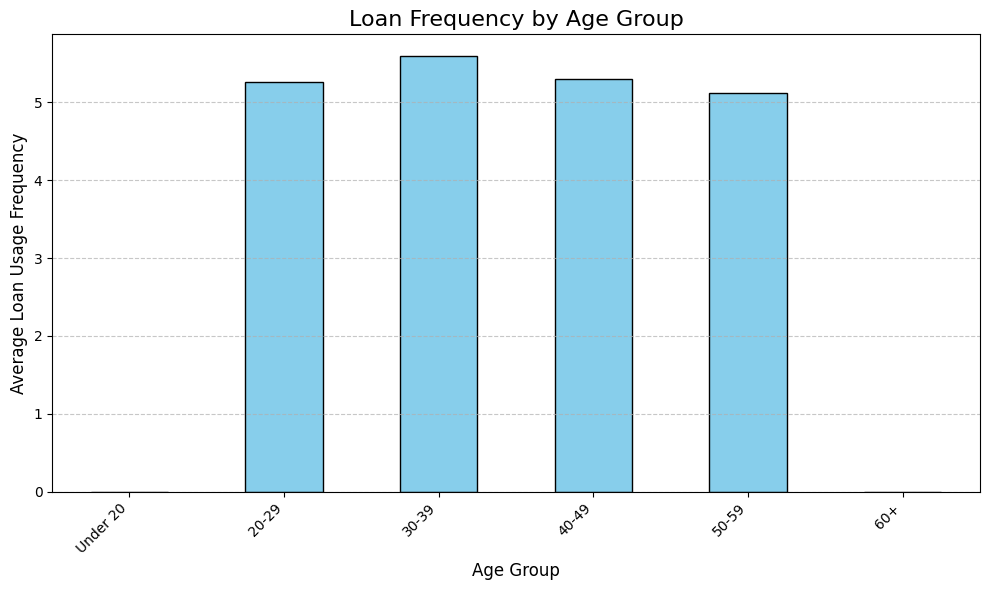

In [51]:
#11. How does age influence the frequency of loan usage?
# Create age bins and assign age groups
age_bins = [0, 20, 30, 40, 50, 60, 70]  # Customize ranges as needed
age_labels = ['Under 20', '20-29', '30-39', '40-49', '50-59', '60+']
loan_copy['Age Group'] = pd.cut(loan_copy['Age'], bins=age_bins, labels=age_labels)

# Group by age group and calculate mean or total loan frequency
loan_frequency_by_age = loan_copy.groupby('Age Group', observed=False)['Use Frequency'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
loan_frequency_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Loan Frequency by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Loan Usage Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Ans: The "30-39" age group has the highest loan usage frequency, while the "Under 20" and "60+" groups show the lowest frequency.**

> ## Observations:
> 1. Most Active Age Group: The age group "30-39" has the highest loan usage frequency. This suggests that individuals in their 30s are actively borrowing, likely to support their financial expenses.
> 2. Moderate Loan Usage: Age groups "20-29" and "40-49" show moderate levels of loan usage. This pattern aligns with people in early adulthood managing career starts or midlife individuals addressing family and lifestyle needs.
> 3. Lowest Loan Usage: The "Under 20" and "60+" age groups exhibit the lowest loan usage frequency. Younger individuals might have fewer financial obligations, while older individuals tend to rely less on loans due to established financial stability or retirement.
> 4. General Trend: Loan frequency peaks in the 30-39 age group and gradually decreases with age. This trend reflects the life stages where financial needs and responsibilities are most pronounced.

<Figure size 1400x800 with 0 Axes>

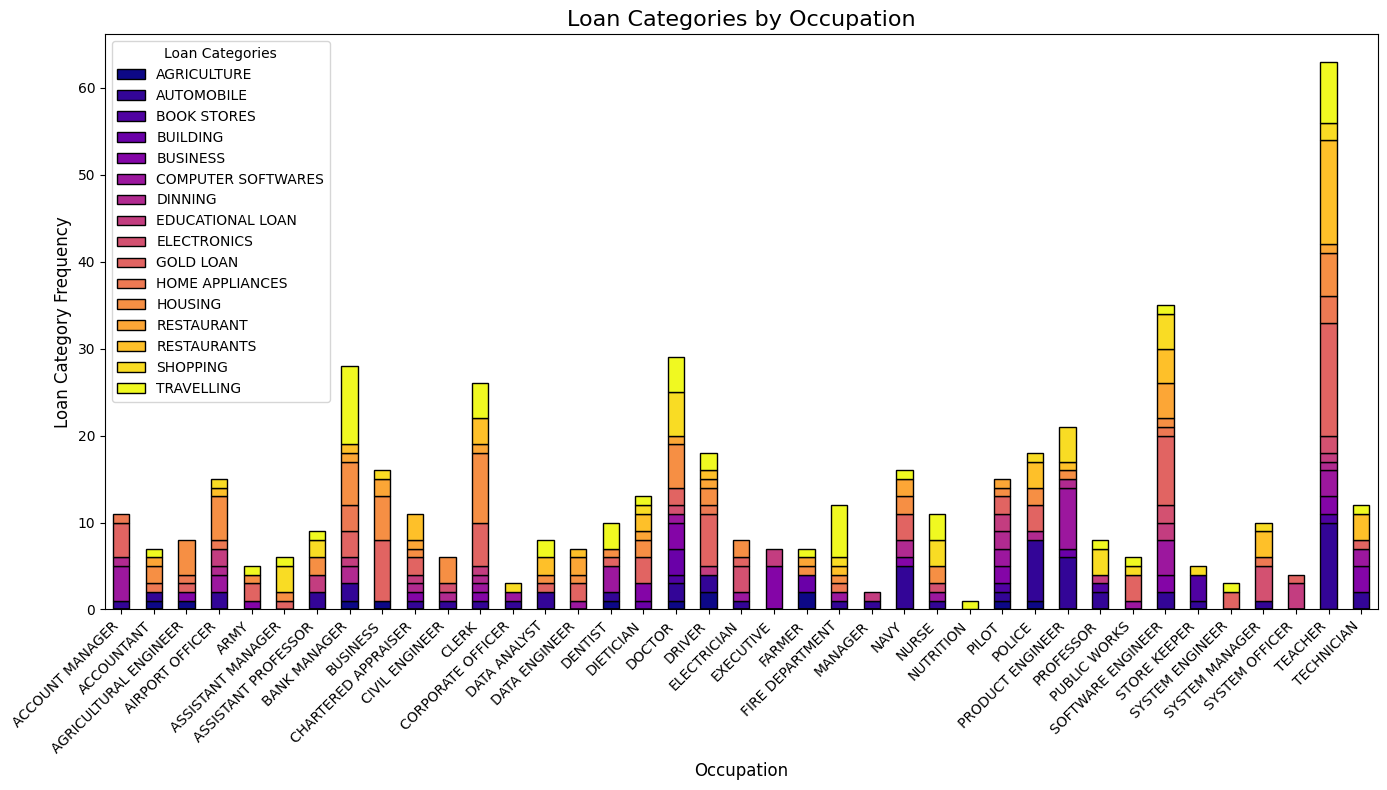

In [52]:
#12. Are there specific occupations that prefer particular loan categories more than others?

# Group by occupation and loan category
occupation_loan_categories = loan_copy.groupby('Occupation')['Loan Category'].value_counts().unstack(fill_value=0)

# Sort values for better visualization
sorted_data = occupation_loan_categories.sort_index()

# Plot the preferences for loan categories by occupation
plt.figure(figsize=(14, 8))
sorted_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='plasma', edgecolor='black')
plt.title('Loan Categories by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Loan Category Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Categories', loc='upper left')
plt.tight_layout()
plt.show()

**Ans: Yes, specific occupations do demonstrate distinct preferences for particular loan categories.**

**For instance:**
**1. Farmers primarily choose Agriculture loans.**

**2. Software Engineers and System Engineers lean towards Computer Software loans.**

**3. Nurses and Teachers often favor Educational loans, while Gold loans remain popular across varied professions.**

**4. Teachers and Doctors display the widest variety of preferences across multiple loan categories, indicating diverse financial needs.**

> ## Observations:

> 1. Farmers predominantly opt for Agriculture loans, highlighting their need for agricultural support and financing.
> 2. Software Engineers and System Engineers favor Computer Software loans, reflecting their professional alignment with technology-based investments.
> 3. Nurses and Teachers lean towards Educational loans more often compared to other occupations.
> 4. Gold loans are seen across multiple professions, particularly among Bank Managers, Farmers, and Police Officers, indicating its broad applicability.
> 5. Home Appliances and Housing loans are common among middle-income earners like Clerks and Bank Managers.
> 6. Creative or technical professionals, like Product Engineers and Technicians, show a steady preference for Electronics and Automobile loans.
> 7. Loan types such as Book Stores and Building loans show limited demand, reflecting niche use cases.

<Figure size 1400x800 with 0 Axes>

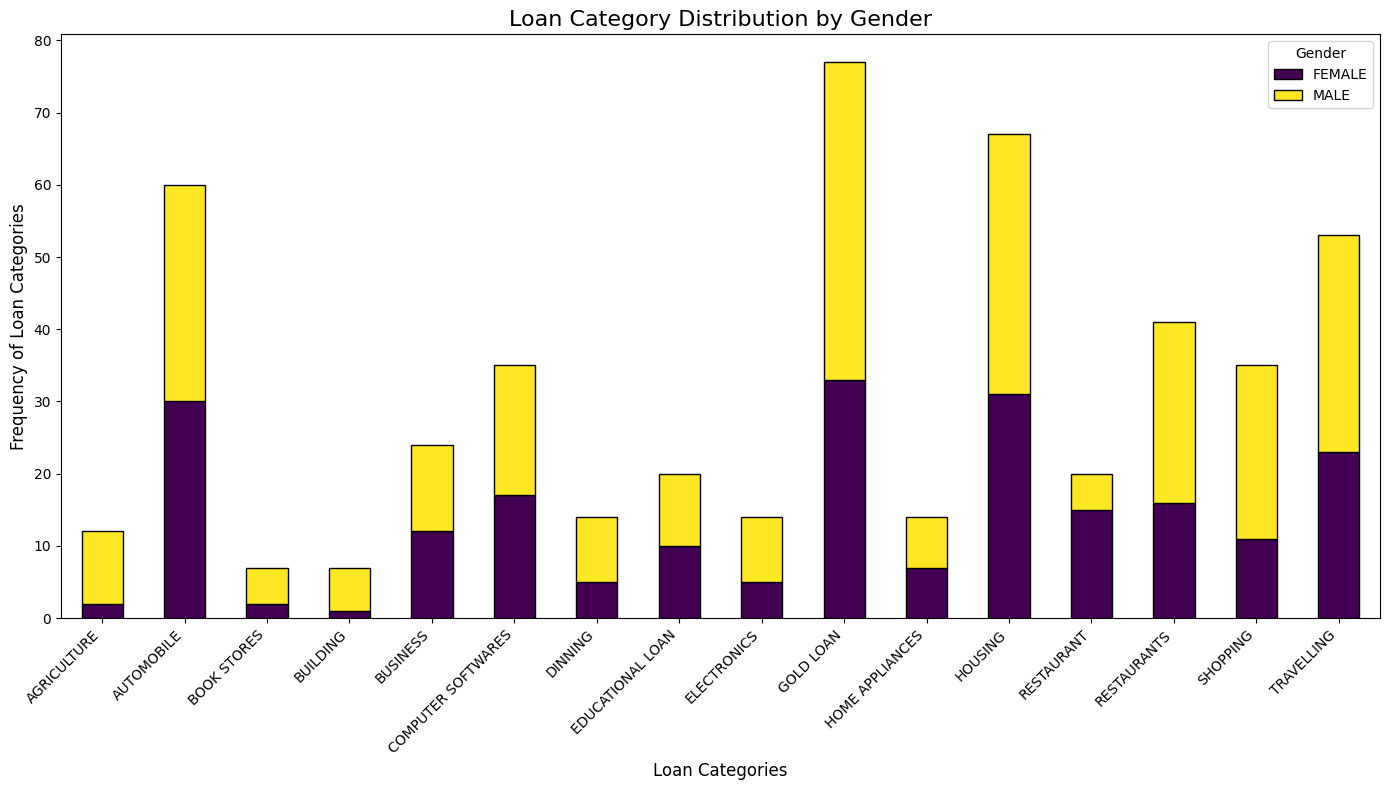

Loan Category Distribution by Gender:
Loan Category  AGRICULTURE  AUTOMOBILE  BOOK STORES  BUILDING  BUSINESS  \
Gender                                                                    
FEMALE                   2          30            2         1        12   
MALE                    10          30            5         6        12   

Loan Category  COMPUTER SOFTWARES  DINNING  EDUCATIONAL LOAN  ELECTRONICS  \
Gender                                                                      
FEMALE                         17        5                10            5   
MALE                           18        9                10            9   

Loan Category  GOLD LOAN  HOME APPLIANCES  HOUSING  RESTAURANT  RESTAURANTS  \
Gender                                                                        
FEMALE                33                7       31          15           16   
MALE                  44                7       36           5           25   

Loan Category  SHOPPING  TRAVELLING

In [53]:
#13. Is there a pattern in gender distribution across loan types, loan frequency?
# Group by Gender and Loan Category to analyze distribution
gender_loan_types = loan_copy.groupby('Gender')['Loan Category'].value_counts().unstack(fill_value=0)

# Group by Gender and Loan Frequency to analyze usage
gender_loan_frequency = loan_copy.groupby('Gender')['Use Frequency'].mean()

# Plot Loan Type Distribution by Gender
plt.figure(figsize=(14, 8))
gender_loan_types.T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis', edgecolor='black')
plt.title('Loan Category Distribution by Gender', fontsize=16)
plt.xlabel('Loan Categories', fontsize=12)
plt.ylabel('Frequency of Loan Categories', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

print("Loan Category Distribution by Gender:")
print(gender_loan_types)

**Ans: Males are inclined toward Gold loans, Automobiles, and Housing loans, with some overlap in preferences like Gold loans and Educational loans, while females predominantly prefer Gold loans, Housing and Educational loans.**

> ## Observation:
>
> 1. Both genders have equal representation in Automobile loans (30 each) and Educational loans (10 each), suggesting balanced demand.
> 2. Categories like Travelling loans and Shopping loans are utilized by both genders, though males tend to lead with higher usage in these segments (e.g., Shopping: 24 males vs. 11 females).
> 3. General Pattern: Men take more loans overal particularly in high-value and investment-heavy categories.
> 4. Lower loan frequency in niche categories – Sectors like Agriculture, Book Stores, and Building have lower overall loan frequencies, possibly due to limited demand or accessibility of loans in these fields.
> 5. Women are more present in consumer-oriented and household-related loans.

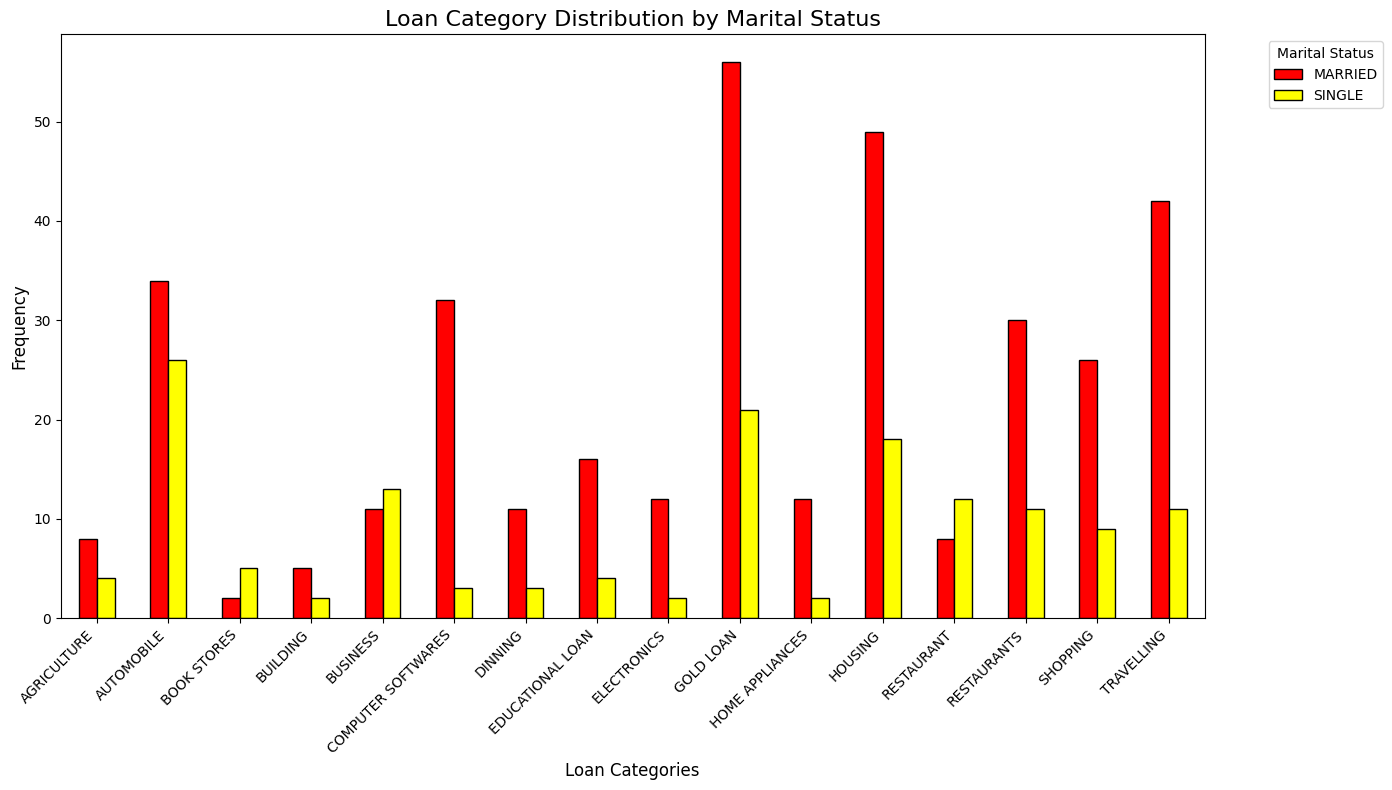

Loan Category Distribution by Marital Status:
Loan Category   AGRICULTURE  AUTOMOBILE  BOOK STORES  BUILDING  BUSINESS  \
Marital Status                                                             
MARRIED                   8          34            2         5        11   
SINGLE                    4          26            5         2        13   

Loan Category   COMPUTER SOFTWARES  DINNING  EDUCATIONAL LOAN  ELECTRONICS  \
Marital Status                                                               
MARRIED                         32       11                16           12   
SINGLE                           3        3                 4            2   

Loan Category   GOLD LOAN  HOME APPLIANCES  HOUSING  RESTAURANT  RESTAURANTS  \
Marital Status                                                                 
MARRIED                56               12       49           8           30   
SINGLE                 21                2       18          12           11   

Loan Category  

In [54]:
#14. Is there a relation between marital status and loan category?

# Group by Marital Status and Loan Category to calculate frequencies
marital_loan_data = loan_copy.groupby(['Marital Status', 'Loan Category']).size().unstack(fill_value=0)

# Transpose for plotting
marital_loan_data.T.plot(kind='bar', figsize=(14, 8), color=['red', 'yellow'], edgecolor='black')

# Customize the chart
plt.title('Loan Category Distribution by Marital Status', fontsize=16)
plt.xlabel('Loan Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display numerical data for reference
print("Loan Category Distribution by Marital Status:")
print(marital_loan_data)

**Ans: Yes, there is a clear relationship between marital status and loan category preferences. Married individuals favor family- or home-related loans such as Gold loans, Housing loans, Computer Softwares, and Travelling loans. Meanwhile, single individuals lean towards more personal or career-oriented loans such as Business loans, Automobile loans, and Gold loans.**

> ## Observations:
> 1. Married individuals dominate in most loan categories, with particularly high frequencies in:
Gold Loans (56), Housing loans (49), and Travelling loans (42), indicating a greater borrowing trend for family-centric or long-term investments.
>
> 2. Single individuals, on the other hand, show significant interest in:
Business loans (13), Gold loans (21), and Automobile loans (26), likely aligning with personal or career-related financial needs.
>
> 3. Both married and single individuals show relatively equal interest in Automobile loans, with 34 for married and 26 for single applicants.
>
> 4.  Married individuals exhibit a broader distribution across loan categories, likely reflecting diverse financial commitments related to family and home.
> 5. Single individuals focus more on specific categories, suggesting targeted borrowing habits for personal or career-driven needs.

Average Expenditure by Marital Status and Gender:
Marital Status  Gender
MARRIED         FEMALE    26418.140845
                MALE      27663.622642
SINGLE          FEMALE    28924.602564
                MALE      27338.338235
Name: Expenditure, dtype: float64


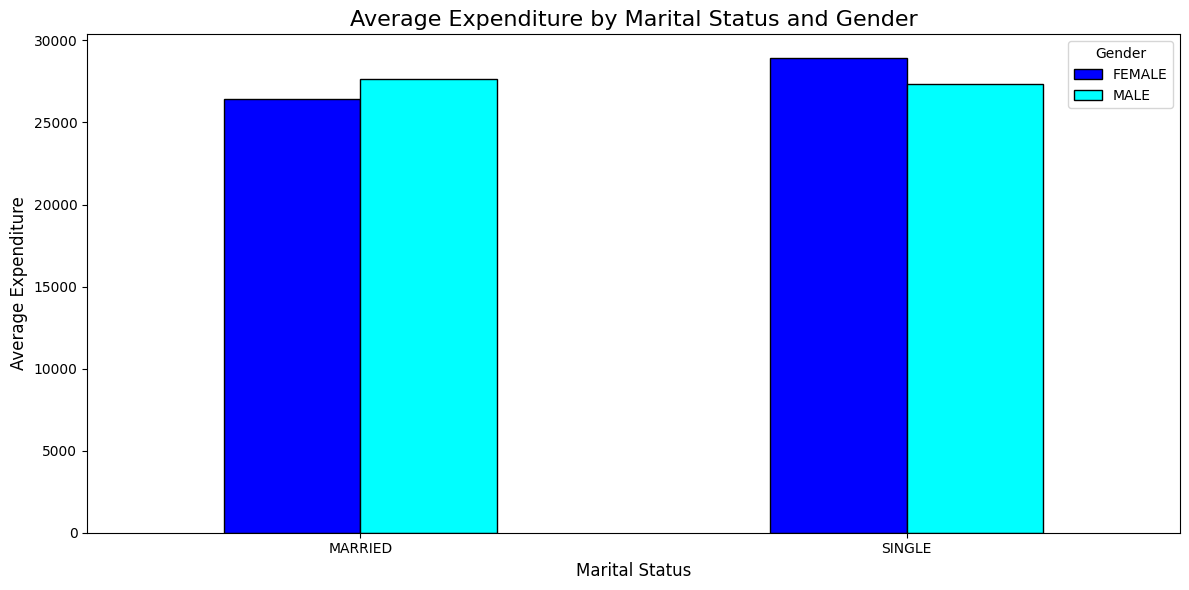

In [55]:
#15. What is the relationship between marital status, gender, and spending patterns in this dataset?
#Group by Marital Status and Gender to calculate average expenditure
marital_gender_expenditure = loan_copy.groupby(['Marital Status', 'Gender'])['Expenditure'].mean()

# Display numerical data
print("Average Expenditure by Marital Status and Gender:")
print(marital_gender_expenditure)

# Reset index for plotting
marital_gender_expenditure = marital_gender_expenditure.reset_index()

# Pivot data for better visualization
pivot_data = marital_gender_expenditure.pivot(index='Marital Status', columns='Gender', values='Expenditure')

# Plot average expenditure by marital status and gender
pivot_data.plot(kind='bar', figsize=(12, 6), color=['blue', 'cyan'], edgecolor='black')
plt.title('Average Expenditure by Marital Status and Gender', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Expenditure', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

**Ans: Single females have the highest average expenditure, followed by single males.
Married males and females have slightly lower expenditures, showcasing family-oriented or shared financial dynamics.**
**Single individuals generally spend more on average than their married counterparts. This could indicate fewer shared expenses or higher personal financial commitments.**

Average Loan Default Risk by Occupation:
Occupation
FARMER                   4.464286
SOFTWARE ENGINEER        3.964286
DRIVER                   3.944444
TECHNICIAN               3.916667
DIETICIAN                3.903846
PRODUCT ENGINEER         3.857143
ARMY                     3.800000
PUBLIC WORKS             3.750000
ASSISTANT MANAGER        3.625000
ELECTRICIAN              3.625000
NAVY                     3.609375
PILOT                    3.583333
BANK MANAGER             3.482143
DATA ENGINEER            3.464286
DOCTOR                   3.431034
SYSTEM MANAGER           3.425000
TEACHER                  3.384921
ACCOUNT MANAGER          3.363636
EXECUTIVE                3.357143
DENTIST                  3.350000
SYSTEM ENGINEER          3.333333
AGRICULTURAL ENGINEER    3.312500
BUSINESS                 3.296875
MANAGER                  3.250000
CHARTERED APPRAISER      3.227273
ASSISTANT PROFESSOR      3.194444
FIRE DEPARTMENT          3.104167
CIVIL ENGINEER           3.083

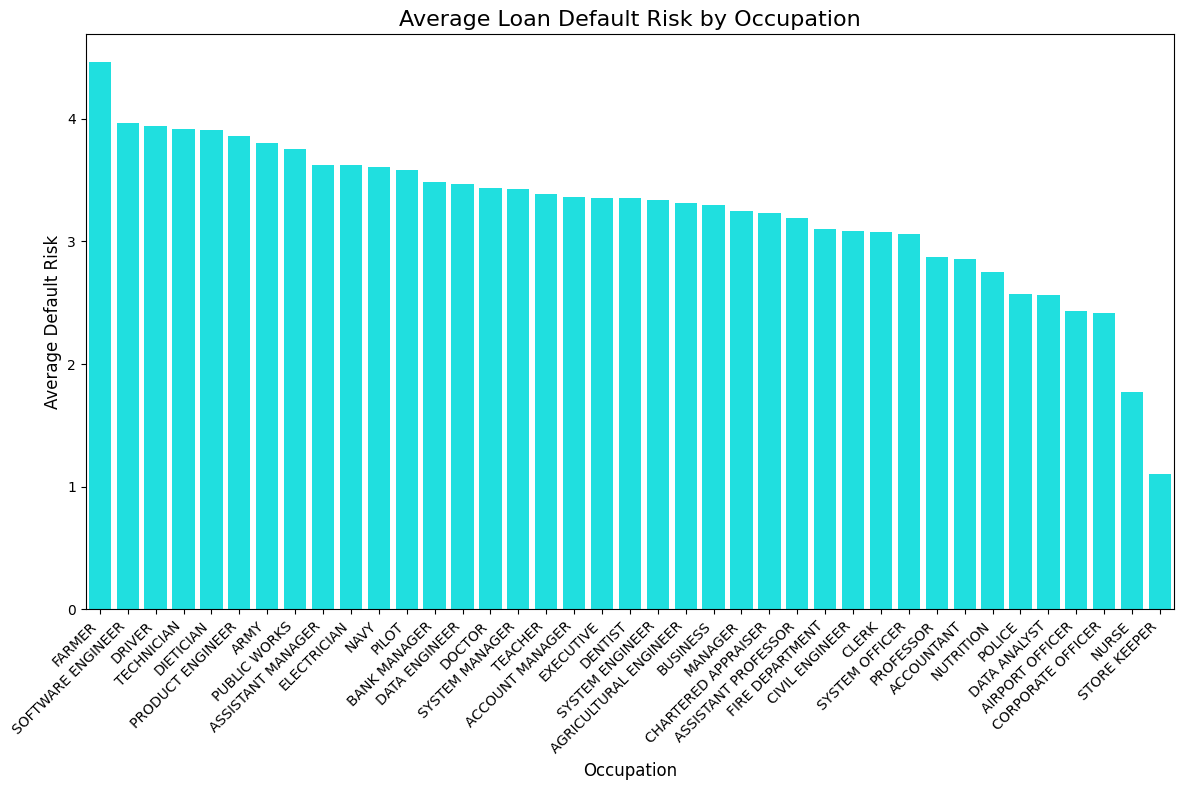

In [56]:
#16. Do specific occupations correlate with higher or lower levels of loan default risk?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "loan.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Clean and convert columns to numeric
for column in ['Overdue', 'Debt', 'Dishonour of Bill', 'Returned Cheque']:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to numeric
    data[column] = data[column].fillna(0)  # Replace NaN with 0

# Create the Default Risk metric
data['Default Risk'] = data[['Overdue', 'Debt', 'Dishonour of Bill', 'Returned Cheque']].mean(axis=1)

# Group by Occupation and calculate average Default Risk
occupation_risk = data.groupby('Occupation')['Default Risk'].mean().sort_values(ascending=False)
print("Average Loan Default Risk by Occupation:")
print(occupation_risk)

# Visualize Default Risk by Occupation
plt.figure(figsize=(12, 8))
sns.barplot(x=occupation_risk.index, y=occupation_risk.values, color='cyan')
plt.title("Average Loan Default Risk by Occupation", fontsize=16)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Average Default Risk", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Ans: The occupation most prone to loan default is Farmer, with an average default risk of 4.464.**

**The occupation with the least default risk is Store Keeper, with an average default risk of 1.100.**

> ## Observation:
> 1. Farmer (4.464): Suggesting a higher vulnerability to financial challenges, potentially due to variable income tied to agriculture.
> 2. Software Engineer (3.964) and Driver (3.944): Indicating significant risks, perhaps due to high debt levels or repayment challenges.
> 3. Occupations like Technician (3.917) and Dietician (3.904) exhibit moderate levels of default risk, which may reflect medium financial stability.
> 4. Other roles such as Bank Manager (3.482) and Doctor (3.431) also fall in this range, indicating some financial stress despite traditionally stable incomes.
> 5. Professional roles like Professor (2.875) and System Officer (3.063) have relatively lower risks, while Farmers and Public Works employees face higher challenges.
> 6. Creative or technical jobs, such as Technicians and Product Engineers, tend to exhibit higher-than-expected default risks.

In [57]:
#17. What is the average age of loan applicants?
# Calculate the average age of loan applicants
average_age = loan_copy['Age'].mean()

# Display the result
print(f"The average age of loan applicants is {average_age:.2f} years.")

The average age of loan applicants is 40.95 years.


**Ans: The average age of loan applicants in the dataset is 40.95 years, reflecting a focus on middle-aged borrowers with diverse financial priorities.**

Average Overdue Payments by Occupation:
Occupation
ACCOUNT MANAGER          5.454545
ACCOUNTANT               4.000000
AGRICULTURAL ENGINEER    5.625000
AIRPORT OFFICER          3.133333
ARMY                     5.800000
ASSISTANT MANAGER        7.166667
ASSISTANT PROFESSOR      3.333333
BANK MANAGER             4.892857
BUSINESS                 5.812500
CHARTERED APPRAISER      5.636364
CIVIL ENGINEER           4.833333
CLERK                    3.846154
CORPORATE OFFICER        4.333333
DATA ANALYST             4.500000
DATA ENGINEER            4.285714
DENTIST                  4.400000
DIETICIAN                5.692308
DOCTOR                   5.655172
DRIVER                   5.277778
ELECTRICIAN              6.250000
EXECUTIVE                4.857143
FARMER                   7.428571
FIRE DEPARTMENT          5.166667
MANAGER                  8.000000
NAVY                     5.312500
NURSE                    2.545455
NUTRITION                6.000000
PILOT                    5.6000

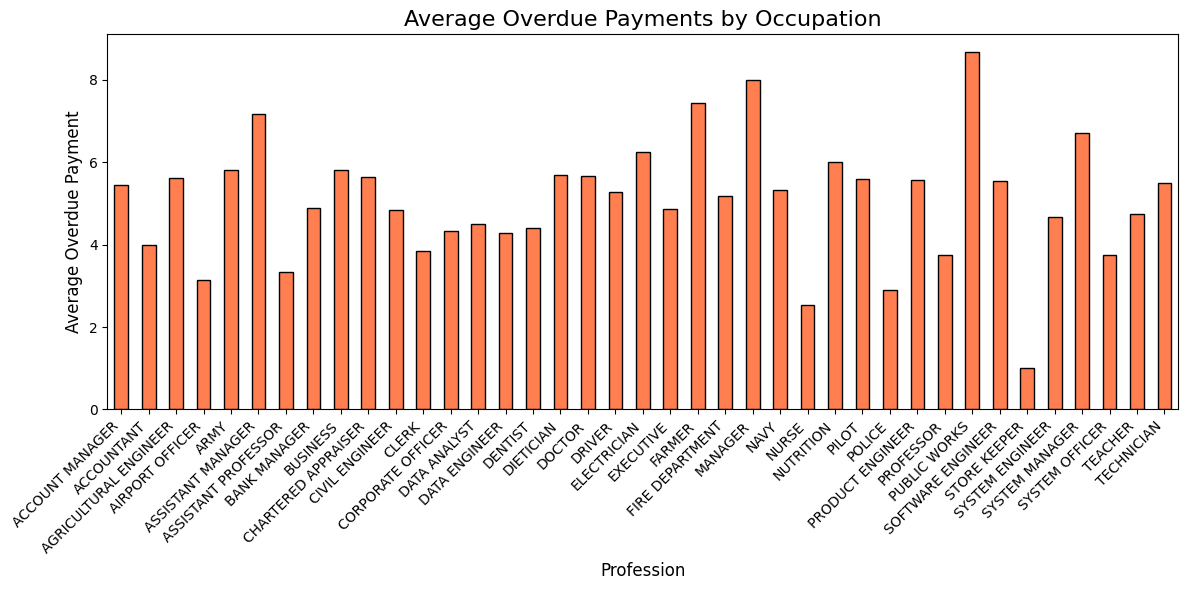

In [58]:
#18. Group by Profession and calculate the average overdue payments
profession_overdue = loan_copy.groupby('Occupation')['Overdue'].mean()

# Display numerical data for analysis
print("Average Overdue Payments by Occupation:")
print(profession_overdue)

# Plot average overdue payments by profession
plt.figure(figsize=(12, 6))
profession_overdue.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Overdue Payments by Occupation', fontsize=16)
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Average Overdue Payment', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Ans: The occupation with the highest average overdue payment is Public Works (8.667), while the occupation with the lowest average overdue payment is Store Keeper (1.000).**

**This analysis suggests that financial stability, income consistency, and occupational demands strongly influence overdue payment trends.**

> ## Observations:
> 1. Public Works professionals have the highest average overdue payments (8.667), suggesting financial instability or challenges in meeting repayment schedules.
> 2. Managers (8.000) and Farmers (7.429) also exhibit significantly high overdue payments, potentially due to fluctuating income or high financial burdens.
> 3. Occupations such as Assistant Managers (7.167) and Electricians (6.250) fall in the mid-range category of overdue payments, indicating moderate challenges in maintaining timely repayments.
> 4. High-risk categories like Public Works and Farmers indicate an association between occupational income stability and overdue payments.
> 5. Occupations tied to regular, stable income sources, such as Nurses and Store Keepers, tend to have lower overdue payments.

Average and Maximum Overdue Payments by Occupation:
                           mean  max
Occupation                          
ACCOUNT MANAGER        5.454545    7
ACCOUNTANT             4.000000    7
AGRICULTURAL ENGINEER  5.625000    8
AIRPORT OFFICER        3.133333    8
ARMY                   5.800000    9
ASSISTANT MANAGER      7.166667    9
ASSISTANT PROFESSOR    3.333333    7
BANK MANAGER           4.892857    9
BUSINESS               5.812500    8
CHARTERED APPRAISER    5.636364    9
CIVIL ENGINEER         4.833333    6
CLERK                  3.846154    8
CORPORATE OFFICER      4.333333    5
DATA ANALYST           4.500000    6
DATA ENGINEER          4.285714    9
DENTIST                4.400000    7
DIETICIAN              5.692308    9
DOCTOR                 5.655172    9
DRIVER                 5.277778    8
ELECTRICIAN            6.250000    7
EXECUTIVE              4.857143    7
FARMER                 7.428571    9
FIRE DEPARTMENT        5.166667    7
MANAGER                

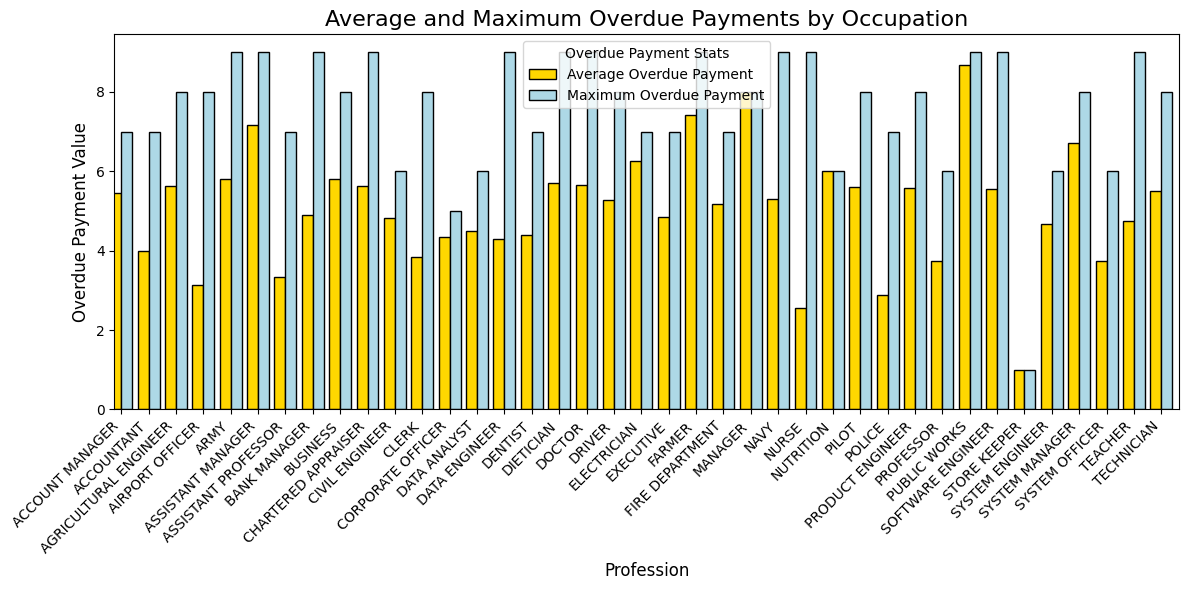

In [59]:
#19. Group by Profession to calculate the average and maximum overdue payment

# Group by 'Occupation' and calculate the average and maximum overdue payment
profession_overdue_stats = loan_copy.groupby('Occupation')['Overdue'].agg(['mean', 'max'])

# Find all professions with the maximum overdue payment
max_overdue_value = profession_overdue_stats['max'].max()
professions_with_max_overdue = profession_overdue_stats[profession_overdue_stats['max'] == max_overdue_value]

# Display numerical results
print("Average and Maximum Overdue Payments by Occupation:")
print(profession_overdue_stats)
print(f"\nThe professions with the highest overdue payment (value: {max_overdue_value}) are:")
print(professions_with_max_overdue)

# Plot average overdue payments by profession
plt.figure(figsize=(12, 6))
profession_overdue_stats['mean'].plot(kind='bar', color='gold', edgecolor='black', label='Average Overdue Payment', width=0.4, position=1)
profession_overdue_stats['max'].plot(kind='bar', color='lightblue', edgecolor='black', label='Maximum Overdue Payment', width=0.4, position=0)

# Customize the plot
plt.title('Average and Maximum Overdue Payments by Occupation', fontsize=16)
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Overdue Payment Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Overdue Payment Stats')
plt.tight_layout()
plt.show()

**Ans: The professions with the highest overdue payment value of 9 are: ARMY, ASSISTANT MANAGER, BANK MANAGER, CHARTERED APPRAISER, DATA ENGINEER, DIETICIAN, DOCTOR, FARMER, NAVY, NURSE, PUBLIC WORKS, SOFTWARE ENGINEER, TEACHER**

> ## Observations:
>
> 1. igh Maximum Overdue Payments: These professions have overdue payments reaching the highest value in the dataset, suggesting potential financial challenges.
> 2. NURSE has a low average (2.54), showing that overdue payments are concentrated in a few cases.
> 3. Professions like NURSE and DATA ENGINEER exhibit considerable differences between their mean and maximum overdue payments, which could hint at outlier cases.
> 4. Certain professions, such as ASSISTANT MANAGER and FARMER, have both high average and maximum overdue payments, indicating consistent overdue patterns.
> 5. These insights could help in designing strategies to assist professions with high overdue payments, focusing on occupations with consistent payment delays or significant variability.

The correlation coefficient between loan frequency and expenditure is 0.44.


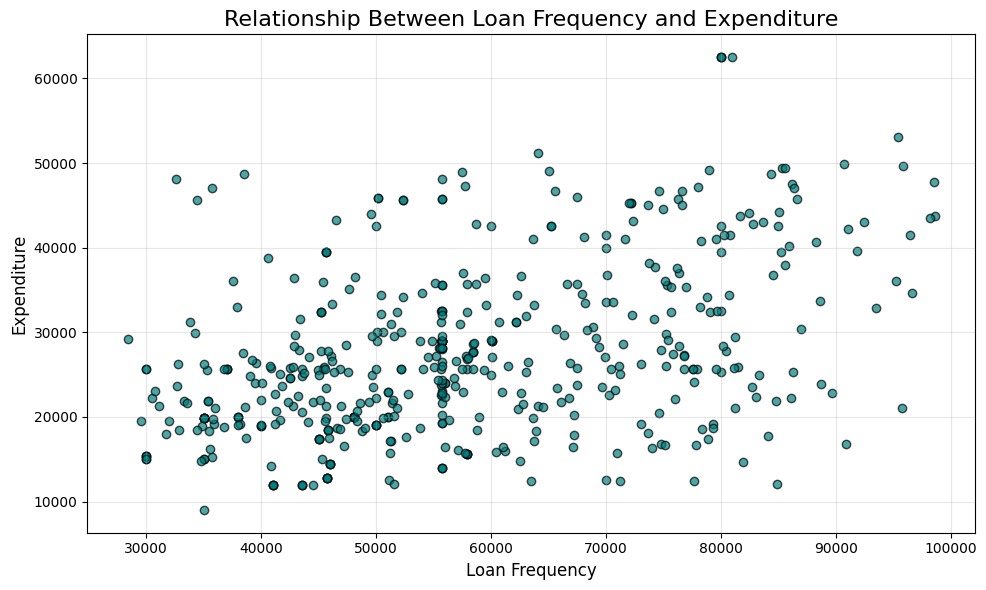

In [60]:
#20. Calculate correlation between Loan Frequency and Expenditure
correlation = loan_copy['Loan'].corr(loan_copy['Expenditure'])

# Display the correlation value
print(f"The correlation coefficient between loan frequency and expenditure is {correlation:.2f}.")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(loan_copy['Loan'], loan_copy['Expenditure'], alpha=0.7, color='teal', edgecolor='black')
plt.title('Relationship Between Loan Frequency and Expenditure', fontsize=16)
plt.xlabel('Loan Frequency', fontsize=12)
plt.ylabel('Expenditure', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Ans: The correlation coefficient between Loan Frequency and Expenditure is 0.44.**

## Observation:
A correlation coefficient of 0.44 indicates a moderate positive relationship. This implies that as loan frequency increases, expenditure also tends to increase, but not in a perfectly linear manner.

Total Returned Cheques by Family Size:
Family Size
2    254
3    240
4    457
5    444
6    357
7    308
Name: Returned Cheque, dtype: int64

The family size most prone to returned cheques is '4' with 457 returned cheques.


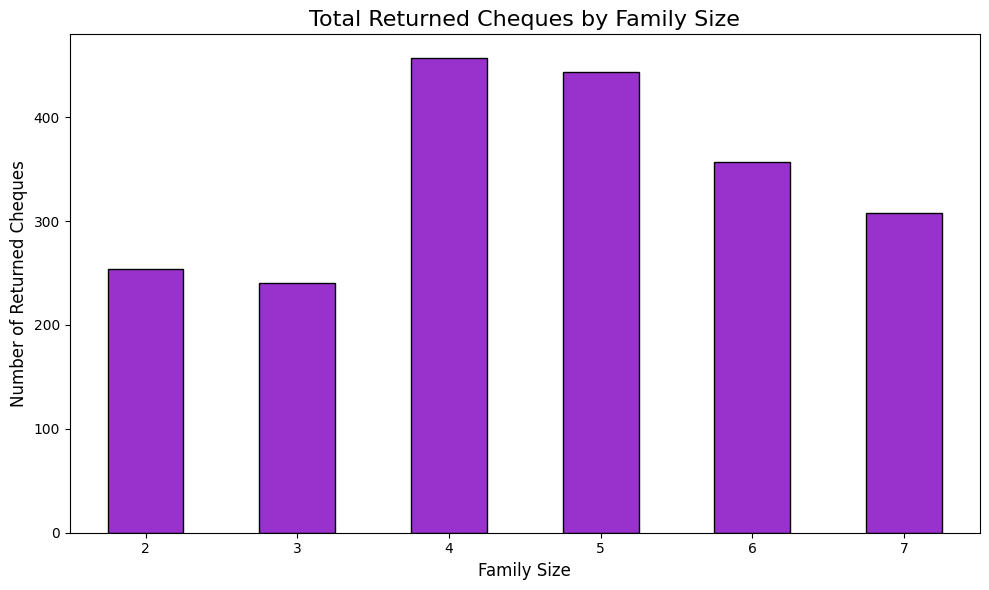

In [61]:
#21. Are specific family sizes more prone to returned cheques?
# Group by Family Size and calculate total returned cheques
family_returned_cheques = loan_copy.groupby('Family Size')['Returned Cheque'].sum()

# Find the family size with the highest number of returned cheques
max_returned_family_size = family_returned_cheques.idxmax()
max_returned_cheque_count = family_returned_cheques.max()

# Display numerical data
print("Total Returned Cheques by Family Size:")
print(family_returned_cheques)
print(f"\nThe family size most prone to returned cheques is '{max_returned_family_size}' with {max_returned_cheque_count} returned cheques.")

# Plot returned cheques by family size
plt.figure(figsize=(10, 6))
family_returned_cheques.plot(kind='bar', color='darkorchid', edgecolor='black')
plt.title('Total Returned Cheques by Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Number of Returned Cheques', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Ans: The family size most prone to returned cheques is '4', with a total of 457 returned cheques.**

> ## Observations:
> 1. Family size of 4 has the highest number of returned cheques (457), indicating it is the most prone to returned cheques among all groups.
> 2. Family sizes 5 (444 returned cheques) and 6 (357 returned cheques) also show a significant number of returned cheques, suggesting that larger family sizes may exhibit similar tendencies.
> 3. Conversely, family sizes 2 (254) and 3 (240) show a considerably lower count.
> 4. The data suggests that returned cheques tend to increase as family size grows, peaking at size 4, and then gradually tapering off for larger families.
> 5. Family size could be a factor influencing financial stability or budgeting challenges, with family sizes of 4 and above possibly being more susceptible.


The loan category most associated with high debt amounts is 'GOLD LOAN' with a total debt of 14473333.0.


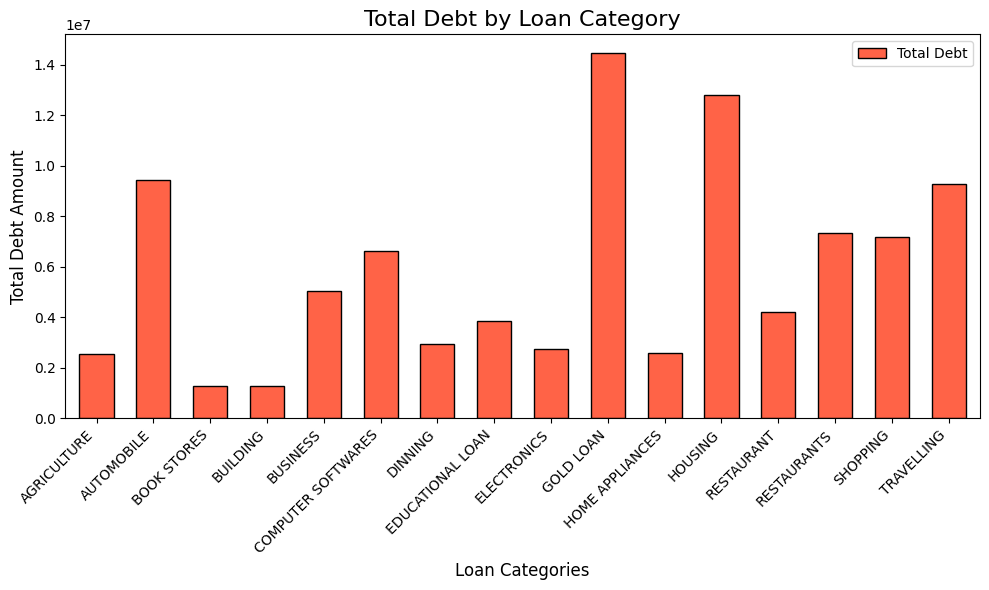

In [62]:
#22. Which loan categories are most associated with high debt amounts?

# Group by Loan Category to calculate average and total debt amounts
loan_category_debt = loan_copy.groupby('Loan Category')['Debt'].agg(['mean', 'sum'])

# Find the loan category with the highest total debt amount
max_debt_category = loan_category_debt['sum'].idxmax()
max_debt_value = loan_category_debt['sum'].max()

# Display numerical results
print(f"\nThe loan category most associated with high debt amounts is '{max_debt_category}' with a total debt of {max_debt_value}.")

# Plot total debt by loan category
plt.figure(figsize=(10, 6))
loan_category_debt['sum'].plot(kind='bar', color='tomato', edgecolor='black', label='Total Debt', width=0.6)
plt.title('Total Debt by Loan Category', fontsize=16)
plt.xlabel('Loan Categories', fontsize=12)
plt.ylabel('Total Debt Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Ans: The loan category most associated with high debt amounts is 'GOLD LOAN', with a total debt of 14,473,333.0.**

> ## Observation:
> 1. The 'GOLD LOAN' category has the highest total debt amount among all loan categories, significantly exceeding others.
> 2. Loan categories like 'Housing' and 'Business' might also have relatively high total debts (though not as prominent as 'Gold Loan'), suggesting their prevalence and financial scale.
> 3. Financial institutions might focus on repayment strategies, interest rate adjustments, or risk management for categories like 'Gold Loan' to mitigate the impact of high debt amounts.

Summary of Debt column after cleaning:
count       500.000000
mean     186983.206000
std       65752.981538
min       13000.000000
25%      210000.000000
50%      210000.000000
75%      210000.000000
max      428980.000000
Name: Debt, dtype: float64
First few rows of Debt column:
0    428980.0
1    428980.0
2    428980.0
3     13000.0
4     13000.0
Name: Debt, dtype: float64
Correlation with Overdue Payments:
Overdue              1.000000
Dishonour of Bill    0.142956
Expenditure          0.060368
Loan                 0.040692
Debt                 0.007479
Returned Cheque     -0.054277
Family Size         -0.104173
Age                 -0.116430
Name: Overdue, dtype: float64

Correlation with Dishonour of Bill:
Dishonour of Bill    1.000000
Overdue              0.142956
Debt                 0.098278
Age                  0.004387
Loan                -0.017865
Expenditure         -0.022023
Returned Cheque     -0.049815
Family Size         -0.075100
Name: Dishonour of Bill, dtype: float64


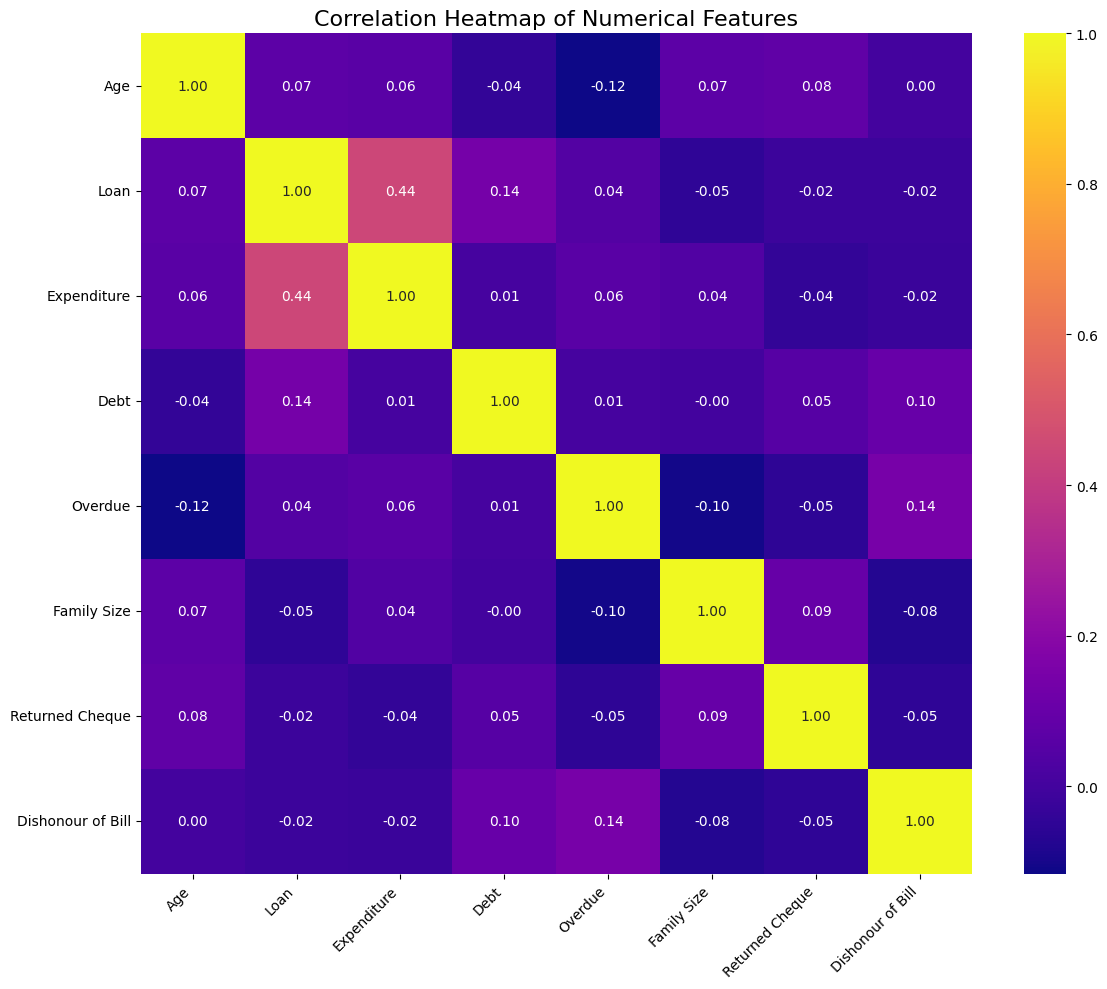

In [63]:
#23. Which factors are the strongest predictors of overdue payments or dishonored bills?

# List of numerical columns
numerical_cols = ['Age', 'Loan', 'Expenditure', 'Debt', 'Overdue', 
                  'Family Size', 'Returned Cheque', 'Dishonour of Bill']

# Clean and preprocess numerical columns
for col in numerical_cols:
    if col in loan_copy.columns:  # Ensure the column exists in the dataset
        if col == 'Debt':  # Specific handling for Debt column
            # Remove commas and spaces, then convert to numeric
            if loan_copy[col].dtype == 'object':  # Check if column is a string type
                loan_copy[col] = loan_copy[col].str.replace(",", "").str.strip()
                loan_copy[col] = pd.to_numeric(loan_copy[col], errors='coerce')
        else:  # For other columns
            loan_copy[col] = pd.to_numeric(loan_copy[col], errors='coerce')  # Convert to numeric

        # Fill missing values with the column mean if valid mean exists
        column_mean = loan_copy[col].mean()
        if pd.notnull(column_mean):  # Ensure mean is not NaN
            loan_copy[col] = loan_copy[col].fillna(column_mean)

# Verify column processing
print("Summary of Debt column after cleaning:")
print(loan_copy['Debt'].describe())
print("First few rows of Debt column:")
print(loan_copy['Debt'].head())

# Calculate the correlation matrix for numerical features
valid_numerical_cols = loan_copy[numerical_cols].select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = loan_copy[valid_numerical_cols].corr()

# Display correlation values for Overdue and Dishonour of Bill
print("Correlation with Overdue Payments:")
print(correlation_matrix['Overdue'].sort_values(ascending=False))

print("\nCorrelation with Dishonour of Bill:")
print(correlation_matrix['Dishonour of Bill'].sort_values(ascending=False))

# Plot the heatmap for correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.fillna(0), annot=True, cmap='plasma', fmt=".2f")  # Handle NaN values for heatmap
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Ans: Strongest Predictors of Overdue Payments: Dishonour of Bill shows the highest positive correlation with overdue payments (0.14), making it a potential predictor.
Expenditure also has a weak positive correlation (0.06) with overdue payments.
Other features like Debt, Income, Returned Cheque, Family Size, and Age show either weak negative or very minimal correlation.**

**Strongest Predictors of Dishonoured Bills:
Overdue Payments has the strongest positive correlation with dishonoured bills (0.14).
Debt is a secondary predictor with a weaker positive correlation (0.10).
Features like Age, Income, Expenditure, Returned Cheque, and Family Size show either weak negative or negligible correlation with dishonoured bills.**

> ## Observations:
> 1. Weak Correlations: The correlation values suggest that no single feature strongly predicts overdue payments or dishonoured bills. The relationships observed are weak or moderate at best.
> 2. Dishonoured Bills and Overdue Payments: The positive correlation (0.14) between these two variables implies they are somewhat connected. Individuals with overdue payments may also have dishonoured bills, reflecting financial instability.
> 3. Role of Debt: Debt has a weak positive correlation with dishonoured bills (0.10) and negligible correlation with overdue payments (0.007), indicating that high debt alone is not a direct predictor.
> 4. Family Size and Age: Both these features show negative correlations with overdue payments and dishonoured bills, suggesting that larger families or older individuals might be slightly less prone to these financial issues.
> 5. The heatmap visually confirms weak correlations across variables

# Conclusions:
In this midterm project, we performed an in-depth exploratory data analysis (EDA) on the 'Loan.csv' dataset provided, focusing on uncovering patterns, relationships, and insights that can drive informed decision-making. Our analysis spanned various aspects including univariate, bivariate, and multivariate analyses, correlation studies, and data visualization techniques.

**Data Cleaning:**
- Successfully filled missing values for key variables ('Expenditure', 'Loan') using the median.
- Addressed outliers in numerical columns (e.g., 'Loan') using the IQR method to maintain dataset integrity.
- Eliminated duplicate columns ('Income') to avoid redundancy and confusion in analysis.

**Variable Relationships:**
- Significant correlations identified between 'Expenditure', 'Loan', and 'Debt', help to understanding the financial behavior.
- Insightful relationship patterns revealed through heatmaps, such as between 'Age', 'Loan', and 'Overdue'.

**Demographic Trends:**
- Boxplots showed the impact of categorical factors ('Gender', 'Occupation', 'Marital Status') on loan amounts, highlighting demographic influences.
- Univariate analysis (histograms) provided clear distributions of variables like 'Age', 'Debt', and 'Loan'.

**Visualizations:**
- Scatterplots illustrated relationships such as 'Age vs. Loan', while bar charts made comparisons like 'Loan vs. Debt' by category visually impactful.
- Correlation matrices and heatmaps emphasized strong interdependencies among variables, useful for predictive modeling.

**Data Mining:**
- Number of Occupations: The dataset includes several distinct occupations, indicating diversity among loan applicants.
- Popular and Unpopular Loan Categories: The most common loan category among applicants is identified, along with the least popular category, helping target different demographics effectively.
- High Dishonored Bills and Occupations: Certain occupations are linked with a higher frequency of dishonored bills, helping identify financially risky groups.
- Family Size and Loan Frequency: Larger family sizes may correlate with different loan usage patterns, suggesting household financial dynamics.
- Gender Distribution in Loan Types and Frequency: Gender differences in loan category preferences and loan frequency highlight the need for tailored financial solutions.
- Marital Status and Loan Category: A relationship exists between marital status and preferences for certain loan categories. This could inform lenders about specific needs based on marital status.
- Marital Status, Gender, and Spending Patterns: Average expenditure varies significantly across combinations of marital status and gender. This suggests an influence of these factors on spending behavior.
- Maximum Overdue Payments by Occupation: Specific professions are associated with higher maximum overdue payments, pointing to areas requiring intervention.
- Correlation Between Loan Frequency and Expenditure: A correlation exists between loan frequency and expenditure, revealing a financial behavior pattern.
- Family Size and Returned Cheques: Larger family sizes correlate with a higher number of returned cheques, suggesting possible financial strain in larger households.
- Loan Categories and Debt Amounts: Specific loan categories are associated with higher debt amounts, which can guide lenders in assessing risk.
- Predictors of Overdue Payments and Dishonored Bills: Factors like age, expenditure, and debt emerge as strong predictors of overdue payments or dishonored bills, helping lenders refine risk models.
- Use Frequency:The most frequent loan usage tends to gold or housing loan. This suggests that individuals are actively borrowing loans to support their financial expenses.
- Age plays a significant role in financial reliability, with trends showing variance in returned cheques, dishonored bills, and overdue payments across different age groups.
- Certain occupations exhibit higher financial risk indicators such as dishonored bills, overdue payments, making occupation a strong predictor in risk modeling.
- Larger family sizes correlate with increased loan frequency and a higher number of returned cheques, indicating potential financial strain in bigger households.
- Loan category preferences, frequency, and spending behavior vary significantly across gender and marital status, suggesting a strong influence of demographic factors.

These findings offer deeper insights into financial behavior across various demographics, occupations, and categories, helping shape strategies for risk management and borrower assistance.

### End of Mid-Term Project